#**Dataset Name : Estimation of obesity levels based on eating habits and physical condition Data Set** 

Abstract: This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.
	
  
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

#INTRODUCTION

Dans ce notebook python, nous allons utiliser le datatset :"Estimation of obesity levels based on eating habits and physical condition Data Set".
Ce dataset a pour vocation de présenter les différents niveaux d'obésité en fonction de plusieurs paramètres.

Nous allons dans un premier temps faire une Data-visualisation afin de montrer le lien entre les variables et la cible. Ici la cible c'est les différents niveaux d'obésité. Dans un second temps nous allons créer des modèles afin de prédire la cible avec les données du dataset. Nous allons ainsi pouvoir comparer les différents modèles réalisés et déterminer le plus pertinant.

Mais avant toute chose, il est important de comprendre comment notre dataset d'étude à été construit.  
Pour cela nous avons consulté le document ci dessous :  
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#bib8    
  
Ce document est un article relatif à notre dataset rédigé par l'auteur de notre dataset où il détaille la manière dont il à récupéré les informations pour construire le dataset.
A la lecture de cet article on apprend quelque chose de très important qui va s'afférer utile pour la compréhension de l'analyse des variables de la partie 3.  
**En effet on apprend que les données composants le dataset proviennent de deux sources différentes.** En premier lieu, les auteurs du dataset ont récupéré les questionnaires auprès de la population grace à une enquête en ligne. La population ciblé est celle du Mexique, de la Colombie et du Pérou. L'enquête a duré 30 jours et a récupéré 485 profils de personnes entre 14 et 61 ans.


### Graphique  montrant la répartition déséquilibrée des données concernant la catégorie des niveaux d'obésité (avec les données provenant d'un questionnaire d'une enquête).
![image 1](https://ars.els-cdn.com/content/image/1-s2.0-S2352340919306985-gr1.jpg)  

On peut voir que parmis les 485 résulats récupéré que la grande majorité des personnes ayant répondu ont une corpulence normale. Cette répartition est normale comme l'explique les auteurs (correspondance par rapport au profil de la population de ces 3 pays). 
Cela étant, les auteurs ont souhaités avoir des données équilibrés pour les différentes corpulences. En effet, comme l'expliquent les auteurs, des données non équilibrés concernant la colonne cible aura des conséquences sur la qualité du modèle de machine learning qui sera entrainé dessus.  
Pour équilibrer les données concernant la catégorie des niveaux d'obésité, ils ont choisi de recourir à des données synthétiques générées à l'aide de l'outil Weka et du filtre SMOTE proposé par d'autres chercheurs dans cet article :  SMOTE: synthetic minority over-sampling technique  
https://www.jair.org/index.php/jair/article/view/10302  

    
### Graphique  montrant la répartition équilibrée des données concernant la catégorie des niveaux d'obésité (ajout des données synthétiques) .
![image 1](https://ars.els-cdn.com/content/image/1-s2.0-S2352340919306985-gr2.jpg)  

Finalement 23 % des données composant le dataset sont extraites d'une enquête en ligne et 77% sont des données synthétiques.
La méthode générant les données synthétiques a utilisé une partie des données de l'enquête afin de générer ses propres données.
Il est fort probales que cela ait pu créer certains biais parmi les données synthétiques notamment pour l'obésité de type 3, où le nombre de données extraites du réel est très faible.  

Nous verrons par la suite que la méthode de création des données synthéques pourrait être responsable de certaines observations contre intuitives.


# PARTIE I: Importation du dataset

In [ ]:
#Nous avons utilisé Google Colab afin de pouvoir travailler à 2 sur le meme notebook (dataset dans un drive partagé)
#Ne pas exécuter cette ligne si vous utilisez Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#remplacez ce chemin d'accès par le vôtre
path = '/content/drive/MyDrive/python A5/'

In [ ]:
import pandas as pd

In [85]:
#On récupère le dataset au format csv depuis le drive
data = pd.read_csv(path + 'dataset.csv', sep=',')

In [ ]:
#Affichage d'une partie du dataset
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**D'après la documentation voici à quoi correspondent les colonnes:**

*   Gender : Le sexe de l'individu (homme ou femme)
*   Age : L'age de l'individu
*   Height : La taille de l'individu
*   Weight : Le poid de l'individu
*   family_history_with_overweight : L'individu à t'il dans sa famille des antécédent avec l'obésité
*   FAVC : Est ce que la personne mange souvent de la nourriture calorique
*   FCVC : Est ce que la personne mange des légumes pendant ses repas
*   NCP : Le nombre de repas quotidiens
*   CAEC : Est ce que la personne mange entre les repas
*   SMOKE : Est ce que l'individu fume
*   CH2O : Consommation quotidienne d'eau
*   SCC : Est ce que la personne surveille le nombre de calories qu'elle mange quotidiennement
*   FAF : Fréquence moyenne de la pratique d'une activité physique
*   TUE : Temps d'utilisation d'objets électroniques
*   CALC : Consommation d'alcool
*   MTRANS : Moyen de transport usuel
*   NObeyesdad : Corpulence, la facon dont s'effectue la classification n'a pas été indiqué par l'éditeur du dataset. Voici cependant la classification que l'on peut retrouver sur le net (suivant l'imc)    
    * Insufficient weight : Less than 19.0
    * Normal: 19.0–24.9
    * Overweight stage 1: 25.0–27.4
    * Overweight stage 2: 27.5–29.9
    * Obese stage 1: 30.0–34.9
    * Obese stage 2: 35.0–39.9
    * (Morbidly) obese stage 3: 40.0 or greater

La taille est exprimée en mètres, et la masse en kilogrammes

**Questions et réponses possible dans l'enquête :**

¿What is your gender?	

* • Female
* • Male

¿what is your age?	Numeric value

¿what is your height?	Numeric value in meters

¿what is your weight?	Numeric value in kilograms

¿Has a family member suffered or suffers from overweight?	

* Yes
* No

¿Do you eat high caloric food frequently?	

* Yes
* No

¿Do you usually eat vegetables in your meals?	

* Never
* Sometimes
* Always

¿How many main meals do you have daily?	

* Between 1 y 2
* Three
* More than three

¿Do you eat any food between meals?	

* No
* Sometimes
* Frequently
* Always

¿Do you smoke?	

* Yes
* No

¿How much water do you drink daily?	

* Less than a liter
* Between 1 and 2 L
* More than 2 L

¿Do you monitor the calories you eat daily?	

* Yes
* No

¿How often do you have physical activity?	

* I do not have
* 1 or 2 days
* 2 or 4 days
* 4 or 5 days

¿How much time do you use technological devices such as cell phone, videogames, television, computer and others?	

* 0–2 hours
* 3–5 hours
* More than 5 hours

¿how often do you drink alcohol?	

* I do not drink
* Sometimes
* Frequently
* Always

¿Which transportation do you usually use?	

* Automobile
* Motorbike
* Bike
* Public Transportation
* Walking

In [ ]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

On remarque que notre dataset est composé de plusieurs colonnes ayant des types différents. Ainsi on a un mélange entre float64 et object. "object" étant une chaine de caractère. Cela implique que lors de l'étude des différentes colonnes et lors de la construction des modèles de machines learning, nous allons devoir modifier les types des colonnes et les adapter à nos besoins.

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


###Vérification de valeur nulles (d'après l'auteur ce n'est pas censé etre possible)

In [ ]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Aucune valeur nulle comme on pouvait s'y attendre étant donné la façon dont a été construite le dataset

# PARTIE II : Renommage de certaines valeurs pour permettre un meilleur affichage par la suite

Lors de l'étude des différentes colonnes, nous allons générer des tableaux permettant de classer les individus suivant une variable et le type de corpulence. Afin de faciliter la compréhension des tableaux nous allons renommer les 7 classifications de la colonne des corpulences afin qu'il puisse etre classé de manière croissante dans le tableau

In [ ]:
# Rennomage des différents types de corpulences afin d'avoir un affichage croissant des IMC (affichage ordre croissant)
def renommage():
  for k in range(0,len(data['NObeyesdad'])):
    if(data['NObeyesdad'][k]=='Insufficient_Weight'):
      data['NObeyesdad'][k]='1 - Insufficient_Weight'
    if(data['NObeyesdad'][k]=='Normal_Weight'):
      data['NObeyesdad'][k]='2 - Normal_Weight'
    if(data['NObeyesdad'][k]=='Overweight_Level_I'):
      data['NObeyesdad'][k]='3 - Overweight_Level_I'
    if(data['NObeyesdad'][k]=='Overweight_Level_II'):
      data['NObeyesdad'][k]='4 - Overweight_Level_II'
    if(data['NObeyesdad'][k]=='Obesity_Type_I'):
      data['NObeyesdad'][k]='5 - Obesity_Type_I'
    if(data['NObeyesdad'][k]=='Obesity_Type_II'):
      data['NObeyesdad'][k]='6 - Obesity_Type_II'
    if(data['NObeyesdad'][k]=='Obesity_Type_III'):
      data['NObeyesdad'][k]='7 - Obesity_Type_III'



In [ ]:
renommage()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib

In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,2 - Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,2 - Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,2 - Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,3 - Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,4 - Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,7 - Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,7 - Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,7 - Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,7 - Obesity_Type_III


In [ ]:
#Importation de seaborn utilisé par la suite
import seaborn 

# PARTIE III: Recherche de facteurs influençant l'obésité parmi les données du dataset et analyse détaillée des différentes colonnes (DATA ANALYS)

### Avant-Propos

Dans cette partie nous allons analyser dans un premier temps la composition de la colonne NObeyesdad.
Dans un second temps nous allons analyser les autres colonnes une par une. Pour chacune de ces colonnes nous allons chercher s'il y a lien évident entre cette colonne et celle de la corpulence (NOeyesdad).
Pour déterminer s'il y a un lien évident nous allons générer 3 tableaux:
- le 1e: Présentera la répartion des individus suivant la colonne analysée.
- le 2e: Présentera le pourcentage de la colonne analysée  suivant la colonne "NObeyesdad".
- le 3e: Présentera le pourcentage de la colonne "NObeyesdad" en fonction de la colonne analysée. 

A la lumière de ces trois tableaux nous essayerons de statuer sur le fait que la variable est ou non une influence sinificative sur la corpulence d'un individu (parmis les données du dataset). En fonction des cas, certains tableaux seront plus utiles que d'autres.  
Une fois toutes les variables analysées nous déterminerons celles dont on jugera judiceux l'utilisation pour entrainer un modèle de machine learning.

**Attention il est important de rappeler que les conclusions qui seront portées sur l'impact d'une variable ne concerneront uniquement que cette variable prise indépendamment des autres. De même les conclusions ne porteront que sur ce dataset, il ne faut pas le généraliser à un autre dataset ou à une population totale.  
De plus cette étude n'est pas une conclusion sur les colonnes qui doivent être utilisées dans le modèle de machine learning de la partie suivante.   
Il s'agit seulement d'une étude simple permettant de mieux connaître et comprendre les différentes colonnes composants notre dataset.**     

***Note : les variables taille et poids ne seront pas analysées car elles ont servi  à calculer la corpulence***

### NObeyesdad (Corpulence)

In [86]:
corpulence_obesite_dataset = data[['NObeyesdad']]
corpulence_obesite_dataset

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


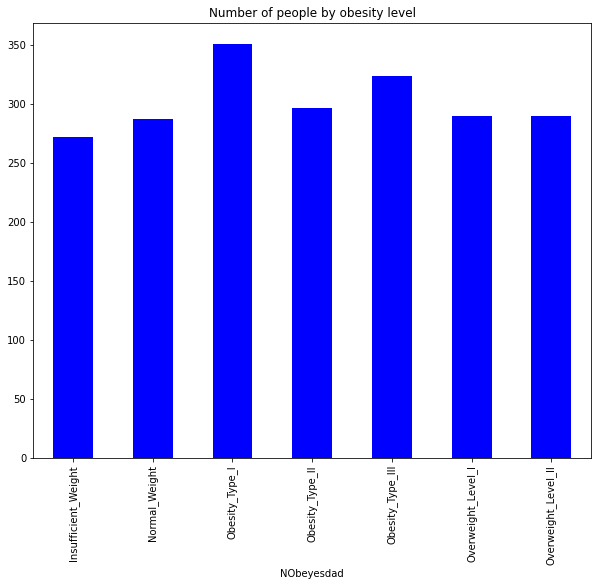

In [87]:
corpulence_obesite_dataset.groupby(["NObeyesdad"]).NObeyesdad.count().plot(kind="bar",title="Number of people by obesity level",color="blue")
result_corpulence_obesite_dataset = corpulence_obesite_dataset.groupby(["NObeyesdad"]).NObeyesdad.count()

On peut remarquer que sur la colonne "NObeyesdad" relative à la corpulence des individus, que les données du dataset sont homogènes vis à vis des 7 corpulences définies. En effet il y a à peu près le même nombre d'individus dans chaque catégorie (ce n'est pas forcément le cas pour les autres paramètres comme nous le ferons par la suite).
Le dataset a donc été construit de façon à ce que la colonne "NObeyesdad" soit la colonne cible.   
**Cela est donc bien conforme aux informations fournies par les auteurs du dataset.**

##Recherche sur les différents facteurs indépendamment des autres

###Gender

In [88]:
#Récupération de la colonne à analyser
sexe_obesite_dataset = data[['Gender','NObeyesdad']]
sexe_obesite_dataset

,Gender,NObeyesdad
0,Female,Normal_Weight
1,Female,Normal_Weight
2,Male,Normal_Weight
3,Male,Overweight_Level_I
4,Male,Overweight_Level_II
...,...,...
2106,Female,Obesity_Type_III
2107,Female,Obesity_Type_III
2108,Female,Obesity_Type_III
2109,Female,Obesity_Type_III


In [89]:

result_sexe_obesite_dataset= sexe_obesite_dataset.groupby(["Gender","NObeyesdad"]).Gender.count().reset_index(name="nombre")
result_sexe_obesite_dataset['nombre']=result_sexe_obesite_dataset['nombre'].astype('float')
result_sexe_obesite_dataset

,Gender,NObeyesdad,nombre
0,Female,Insufficient_Weight,173.0
1,Female,Normal_Weight,141.0
2,Female,Obesity_Type_I,156.0
3,Female,Obesity_Type_II,2.0
4,Female,Obesity_Type_III,323.0
5,Female,Overweight_Level_I,145.0
6,Female,Overweight_Level_II,103.0
7,Male,Insufficient_Weight,99.0
8,Male,Normal_Weight,146.0
9,Male,Obesity_Type_I,195.0


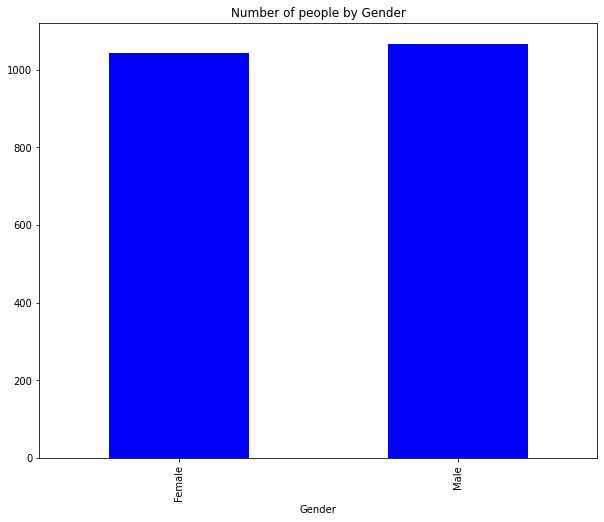

In [90]:
# Répartition des individus suivant la colonne "Gender"
sexe_dataset_count = sexe_obesite_dataset.groupby(["Gender"]).Gender.count()
sexe_obesite_dataset.groupby(["Gender"]).Gender.count().plot(kind="bar",title="Number of people by Gender",color="blue")

On remarque une répartition équivalente entre femmes et hommes dans le dataset

In [91]:
#Convertion en pourcentage
tt_h = 0
tt_f =0
for k in range(0,7):
  tt_f += result_sexe_obesite_dataset['nombre'][k]
for k in range(7,14):
  tt_h += result_sexe_obesite_dataset['nombre'][k]
for i in range(0,7):
  result_sexe_obesite_dataset['nombre'][i] =   (result_sexe_obesite_dataset['nombre'][i] /tt_f )*100
  result_sexe_obesite_dataset['nombre'][i+7] = (result_sexe_obesite_dataset['nombre'][i+7] /tt_h )*100

result_sexe_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Gender,NObeyesdad,nombre
0,Female,Insufficient_Weight,16.586769
1,Female,Normal_Weight,13.518696
2,Female,Obesity_Type_I,14.956855
3,Female,Obesity_Type_II,0.191755
4,Female,Obesity_Type_III,30.968360
5,Female,Overweight_Level_I,13.902205
6,Female,Overweight_Level_II,9.875360
7,Male,Insufficient_Weight,9.269663
8,Male,Normal_Weight,13.670412
9,Male,Obesity_Type_I,18.258427


In [92]:
# Pourcentage de la colonne "Gender" en fonction de la colonne "NObeyesdad"
result_sexe_obesite_dataset= result_sexe_obesite_dataset.groupby(["Gender","NObeyesdad"]).nombre.sum()
result_sexe_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,16.586769,13.518696,14.956855,0.191755,30.968360,13.902205,9.875360
Male,9.269663,13.670412,18.258427,27.621723,0.093633,13.576779,17.509363


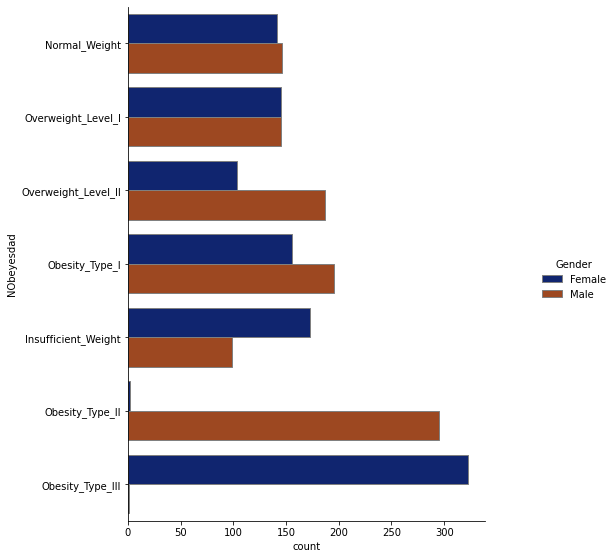

In [96]:
# Représentation graphique du nombre d'individus selon "Gender" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="Gender", kind="count", palette="dark", edgecolor=".5",data=data)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [97]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "Gender"
result_sexe_obesite_dataset= sexe_obesite_dataset.groupby(["Gender","NObeyesdad"]).Gender.count().reset_index(name="nombre")
result_sexe_obesite_dataset['nombre']=result_sexe_obesite_dataset['nombre'].astype('float')
datatemp=result_sexe_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["Gender","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,173.0,141.0,156.0,2.0,323.0,145.0,103.0
Male,99.0,146.0,195.0,295.0,1.0,145.0,187.0


On peut observer que la différence de poids entre hommes et femmes n'est que peu sinificative dans la plupart des cas. Néanmoins certains écarts comme pour "Insufficient_Weight" semblent indiquer qu'une maigreur excessive concerne d'avantage les femmes que les hommes (écart de 8%). De même on remarque que l'obésité de type 2 semble ne concerner presque exclusivement que les hommes et à contrario l'obésité de type 3 presque exclusivement que les femmes.
Compte tenu de ces observations, de la bonne repartition des données entre hommes et femmes, on peut estimer que le sexe n'est pas à lui seul en mesure d'influencer de manière importante la corpulence. Tout au plus il pourrait être utile pour conforter un choix entre l'obésité de type 2 (qui ne concerne presque que les hommes) et la maigreur excessive (qui semble concerner d'avantage les femmes).

###Age

In [98]:
#Récupération de la colonne à analyser
age_obesite_dataset = data[['Age','NObeyesdad']]
age_obesite_dataset

,Age,NObeyesdad
0,21.000000,Normal_Weight
1,21.000000,Normal_Weight
2,23.000000,Normal_Weight
3,27.000000,Overweight_Level_I
4,22.000000,Overweight_Level_II
...,...,...
2106,20.976842,Obesity_Type_III
2107,21.982942,Obesity_Type_III
2108,22.524036,Obesity_Type_III
2109,24.361936,Obesity_Type_III


In [99]:
#On crée des groupes d'âges afin de pouvoir comparer les données
bins= [10,20,30,40,50,60]
labels = ['10-20','20-30','30-40','40-50','50 et +']
age_obesite_dataset['AgeGroup'] = pd.cut(age_obesite_dataset['Age'], bins=bins, labels=labels, right=False)
age_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,NObeyesdad,AgeGroup
0,21.000000,Normal_Weight,20-30
1,21.000000,Normal_Weight,20-30
2,23.000000,Normal_Weight,20-30
3,27.000000,Overweight_Level_I,20-30
4,22.000000,Overweight_Level_II,20-30
...,...,...,...
2106,20.976842,Obesity_Type_III,20-30
2107,21.982942,Obesity_Type_III,20-30
2108,22.524036,Obesity_Type_III,20-30
2109,24.361936,Obesity_Type_III,20-30


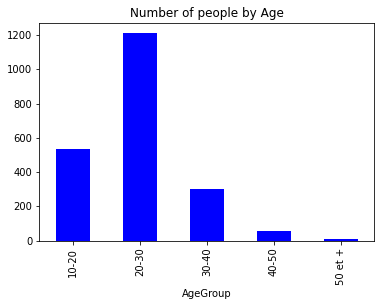

In [100]:
age_obesite_dataset.groupby(["AgeGroup"]).AgeGroup.count().plot(kind="bar",title="Number of people by Age",color="blue")
age_obesite_dataset_AgeGroup_count = age_obesite_dataset.groupby(["AgeGroup"]).AgeGroup.count()

On remarque que les données du dataset ne sont pas homogène en terme d'age. En effet il y a beaucoup plus de personne agé de 20 à 30 ans que tout les autres cathégories d'age.

In [101]:
result_age_obesite_dataset = age_obesite_dataset.groupby(["AgeGroup","NObeyesdad"]).AgeGroup.count().reset_index(name="nombre")
result_age_obesite_dataset['nombre']=result_age_obesite_dataset['nombre'].astype('float')
result_age_obesite_dataset

,AgeGroup,NObeyesdad,nombre
0,10-20,Insufficient_Weight,176.0
1,10-20,Normal_Weight,102.0
2,10-20,Obesity_Type_I,74.0
3,10-20,Obesity_Type_II,0.0
4,10-20,Obesity_Type_III,43.0
5,10-20,Overweight_Level_I,88.0
6,10-20,Overweight_Level_II,54.0
7,20-30,Insufficient_Weight,93.0
8,20-30,Normal_Weight,165.0
9,20-30,Obesity_Type_I,190.0


In [102]:
# Pourcentage de la colonne "AGE" en fonction de la colonne "NObeyesdad"
for i in range(0,7):
  result_age_obesite_dataset['nombre'][i] =   (result_age_obesite_dataset['nombre'][i] /age_obesite_dataset_AgeGroup_count[0] )*100
  result_age_obesite_dataset['nombre'][i+7] = (result_age_obesite_dataset['nombre'][i+7] /age_obesite_dataset_AgeGroup_count[1] )*100
  result_age_obesite_dataset['nombre'][i+14] = (result_age_obesite_dataset['nombre'][i+14] /age_obesite_dataset_AgeGroup_count[2] )*100
  result_age_obesite_dataset['nombre'][i+21] = (result_age_obesite_dataset['nombre'][i+21] /age_obesite_dataset_AgeGroup_count[3] )*100
  result_age_obesite_dataset['nombre'][i+28] = (result_age_obesite_dataset['nombre'][i+28] /age_obesite_dataset_AgeGroup_count[4] )*100

result_age_obesite_dataset= result_age_obesite_dataset.groupby(["AgeGroup","NObeyesdad"]).nombre.sum()
result_age_obesite_dataset.unstack()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
AgeGroup,,,,,,,
10-20,32.774674,18.994413,13.780261,0.000000,8.007449,16.387337,10.055866
20-30,7.685950,13.636364,15.702479,15.289256,23.223140,13.057851,11.404959
30-40,0.996678,5.980066,20.598007,33.222591,0.000000,12.292359,26.910299
40-50,0.000000,0.000000,45.283019,22.641509,0.000000,11.320755,20.754717
50 et +,0.000000,11.111111,11.111111,0.000000,0.000000,11.111111,66.666667


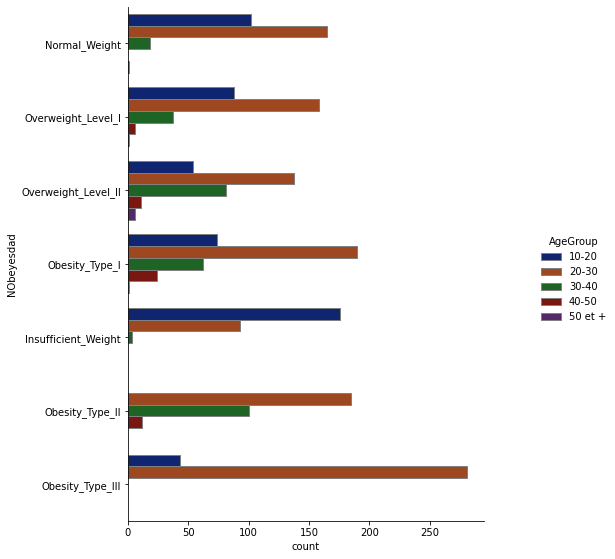

In [103]:
# Représentation graphique du nombre d'individus selon "Age" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="AgeGroup", kind="count", palette="dark", edgecolor=".5",data=age_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [104]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "AGE"
result_age_obesite_dataset= age_obesite_dataset.groupby(["AgeGroup","NObeyesdad"]).AgeGroup.count().reset_index(name="nombre")
result_age_obesite_dataset['nombre']=result_age_obesite_dataset['nombre'].astype('float')
datatemp=result_age_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["AgeGroup","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
AgeGroup,,,,,,,
10-20,176.0,102.0,74.0,0.0,43.0,88.0,54.0
20-30,93.0,165.0,190.0,185.0,281.0,158.0,138.0
30-40,3.0,18.0,62.0,100.0,0.0,37.0,81.0
40-50,0.0,0.0,24.0,12.0,0.0,6.0,11.0
50 et +,0.0,1.0,1.0,0.0,0.0,1.0,6.0


Concernant le facteur "Age", on observe déjà un déséquilibre des données concernant cette variable. Le fait que l'ensemble des données ne soient pas réparties de manière homogène rend dificile la lisibilité de l'impact de l'âge sur la corpulence. On peut néamnoins voir que la maigreur excessive concerne plutôt les gens très jeunes entre 10 et 20 ans et de meme l'obésité de type 3 ne semble pas concerner les personnes de plus de 30 ans.
Quoiqu'il en soit le paramètre "Age" n'a pas à lui seul un impact visible sur la corpulence d'un individu.

### Antécédants familliaux

In [105]:
#Récupération de la colonne à analyser
family_history_obesite_dataset = data[['family_history_with_overweight','NObeyesdad']]
family_history_obesite_dataset

,family_history_with_overweight,NObeyesdad
0,yes,Normal_Weight
1,yes,Normal_Weight
2,yes,Normal_Weight
3,no,Overweight_Level_I
4,no,Overweight_Level_II
...,...,...
2106,yes,Obesity_Type_III
2107,yes,Obesity_Type_III
2108,yes,Obesity_Type_III
2109,yes,Obesity_Type_III


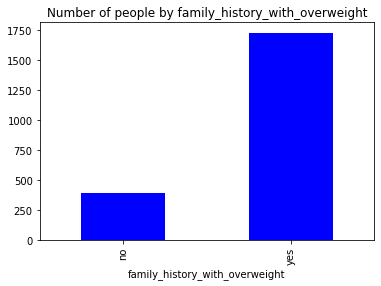

In [106]:
#Répartition des individu suivant la colonne "family_history_with_overweight"
family_history_obesite_dataset_count = family_history_obesite_dataset.groupby(["family_history_with_overweight"]).family_history_with_overweight.count().plot(kind="bar",title="Number of people by family_history_with_overweight",color="blue")


On remarque que le dataset n'est pas équilibré concenant la colonne "family_history_with_overweight"

In [107]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_family_history_obesite_dataset = family_history_obesite_dataset.groupby(["family_history_with_overweight","NObeyesdad"]).family_history_with_overweight.count()
result_family_history_obesite_dataset

family_history_with_overweight  NObeyesdad         
no                              Insufficient_Weight    146
                                Normal_Weight          132
                                Obesity_Type_I           7
                                Obesity_Type_II          1
                                Overweight_Level_I      81
                                Overweight_Level_II     18
yes                             Insufficient_Weight    126
                                Normal_Weight          155
                                Obesity_Type_I         344
                                Obesity_Type_II        296
                                Obesity_Type_III       324
                                Overweight_Level_I     209
                                Overweight_Level_II    272
Name: family_history_with_overweight, dtype: int64

In [108]:
# Pourcentage de la colonne "family_history_with_overweight" en fonction de la colonne "NObeyesdad"
tt_n = 0
tt_y =0
for k in range(0,6):
  tt_n += result_family_history_obesite_dataset[k]
for k in range(6,13):
  tt_y += result_family_history_obesite_dataset[k]

for i in range(0,6):
  result_family_history_obesite_dataset[i] =   (result_family_history_obesite_dataset[i] /tt_n )*100
for i in range(6, 13):
  result_family_history_obesite_dataset[i] =   (result_family_history_obesite_dataset[i] /tt_y )*100

result_family_history_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,37.0,34.0,1.0,0.0,NaN,21.0,4.0
yes,7.0,8.0,19.0,17.0,18.0,12.0,15.0


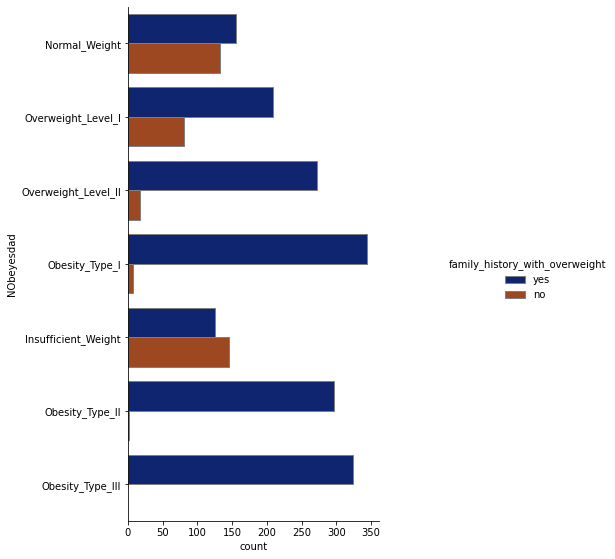

In [109]:
# Représentation graphique du nombre d'individus selon "family_history_with_overweight" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="family_history_with_overweight", kind="count", palette="dark", edgecolor=".5",data=family_history_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [110]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "family_history_with_overweight"
result_family_history_obesite_dataset= family_history_obesite_dataset.groupby(["family_history_with_overweight","NObeyesdad"]).family_history_with_overweight.count().reset_index(name="nombre")
result_family_history_obesite_dataset['nombre']=result_family_history_obesite_dataset['nombre'].astype('float')
datatemp=result_family_history_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["family_history_with_overweight","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,146.0,132.0,7.0,1.0,NaN,81.0,18.0
yes,126.0,155.0,344.0,296.0,324.0,209.0,272.0


On peut constater que l'obésite semble être héréditaire. En effet, malgré le fait que les données ne soient pas réparties équitablement entre les deux possibilités, il semble évident d'après l'analyse effectuée qu'un individu sans antécédents avec les problèmes de poids n'a que peu de chances d'être concerné par une corpulence supérieure à un surpoids de type 1.
On peut donc conclure que la variable "family_history_with_overweight" a une forte influence sur la corpulence d'un individu. (surtout dans le cas où il n'y a pas d'antécédents)

###Consommation de nourriture calorique

In [111]:
#Récupération de la colonne à analyser
favc_obesite_dataset = data[['FAVC','NObeyesdad']]
favc_obesite_dataset

,FAVC,NObeyesdad
0,no,Normal_Weight
1,no,Normal_Weight
2,no,Normal_Weight
3,no,Overweight_Level_I
4,no,Overweight_Level_II
...,...,...
2106,yes,Obesity_Type_III
2107,yes,Obesity_Type_III
2108,yes,Obesity_Type_III
2109,yes,Obesity_Type_III


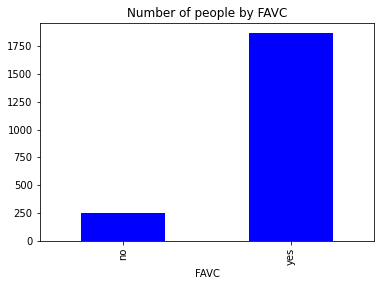

In [112]:
#Répartition des individus suivant la colonne "FAVC"
favc_obesite_dataset_count = favc_obesite_dataset.groupby(["FAVC"]).FAVC.count().plot(kind="bar",title="Number of people by FAVC",color="blue")

On remarque que parmis les données on a beaucoup plus d'individu consommant de la nourriture calorique comparé à ceux qui n'en consomment pas.

In [113]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_favc_obesite_dataset= favc_obesite_dataset.groupby(["FAVC","NObeyesdad"]).FAVC.count().reset_index(name="nombre")
result_favc_obesite_dataset['nombre']=result_favc_obesite_dataset['nombre'].astype('float')
result_favc_obesite_dataset

,FAVC,NObeyesdad,nombre
0,no,Insufficient_Weight,51.0
1,no,Normal_Weight,79.0
2,no,Obesity_Type_I,11.0
3,no,Obesity_Type_II,7.0
4,no,Obesity_Type_III,1.0
5,no,Overweight_Level_I,22.0
6,no,Overweight_Level_II,74.0
7,yes,Insufficient_Weight,221.0
8,yes,Normal_Weight,208.0
9,yes,Obesity_Type_I,340.0


In [114]:
# Pourcentage de la colonne "FAVC" en fonction de la colonne "NObeyesdad"
tt_n = 0
tt_y =0
for k in range(0,7):
  tt_n += result_favc_obesite_dataset['nombre'][k]
for k in range(7,14):
  tt_y += result_favc_obesite_dataset['nombre'][k]
for i in range(0,7):
  result_favc_obesite_dataset['nombre'][i] =   (result_favc_obesite_dataset['nombre'][i] /tt_n )*100
for i in range(7, 14):
  result_favc_obesite_dataset['nombre'][i] =   (result_favc_obesite_dataset['nombre'][i] /tt_y )*100

result_favc_obesite_dataset= result_favc_obesite_dataset.groupby(["FAVC","NObeyesdad"]).nombre.sum()
result_favc_obesite_dataset.unstack()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,20.816327,32.244898,4.489796,2.857143,0.408163,8.979592,30.204082
yes,11.843516,11.146838,18.220793,15.541265,17.309753,14.362272,11.575563


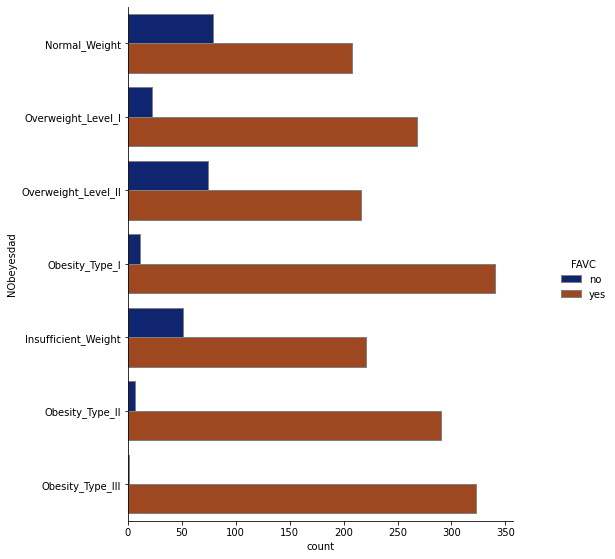

In [115]:
# Représentation graphique du nombre d'individus selon "FAVC" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="FAVC", kind="count", palette="dark", edgecolor=".5",data=favc_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [116]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "FAVC"
result_favc_obesite_dataset= favc_obesite_dataset.groupby(["FAVC","NObeyesdad"]).FAVC.count().reset_index(name="nombre")
result_favc_obesite_dataset['nombre']=result_favc_obesite_dataset['nombre'].astype('float')
datatemp=result_favc_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["FAVC","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,51.0,79.0,11.0,7.0,1.0,22.0,74.0
yes,221.0,208.0,340.0,290.0,323.0,268.0,216.0


D'apres l'observation des données relatives à la consommation de nourriture calorique, on peut remarquer que les individus ne consommant pas de nourriture calorique ne sont presque pas concerné par l'obésité ( type 1 à 3).
On peut donc conclure que la consommation de nourriture calorique à un impact sur la corpulence des individus.

###Consommation de légumes

In [117]:
#Récupération de la colonne à analyser
fcvc_obesite_dataset = data[['FCVC','NObeyesdad']]

#Conversion de la colonne NCP en entier car en float64 le groupby suivant entraine des erreurs d'arrondis et ensuite en string pour pouvoir appeler la colonne
fcvc_obesite_dataset['FCVC']=fcvc_obesite_dataset['FCVC'].astype('int')
fcvc_obesite_dataset['FCVC']=fcvc_obesite_dataset['FCVC'].astype('str')
fcvc_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FCVC,NObeyesdad
0,2,Normal_Weight
1,3,Normal_Weight
2,2,Normal_Weight
3,3,Overweight_Level_I
4,2,Overweight_Level_II
...,...,...
2106,3,Obesity_Type_III
2107,3,Obesity_Type_III
2108,3,Obesity_Type_III
2109,3,Obesity_Type_III


In [118]:
#Renomage des valeurs numériques selon les valeurs de l'étude (cf Partie 1)
for i in range(0,len(fcvc_obesite_dataset)):
  if (fcvc_obesite_dataset['FCVC'][i] == "1"):
    fcvc_obesite_dataset['FCVC'][i]="Never"
  if (fcvc_obesite_dataset['FCVC'][i]== "2"):
    fcvc_obesite_dataset['FCVC'][i]="Sometimes"
  if (fcvc_obesite_dataset['FCVC'][i] == "3"):
    fcvc_obesite_dataset['FCVC'][i]="Always"
 
fcvc_obesite_dataset

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,FCVC,NObeyesdad
0,Sometimes,Normal_Weight
1,Always,Normal_Weight
2,Sometimes,Normal_Weight
3,Always,Overweight_Level_I
4,Sometimes,Overweight_Level_II
...,...,...
2106,Always,Obesity_Type_III
2107,Always,Obesity_Type_III
2108,Always,Obesity_Type_III
2109,Always,Obesity_Type_III


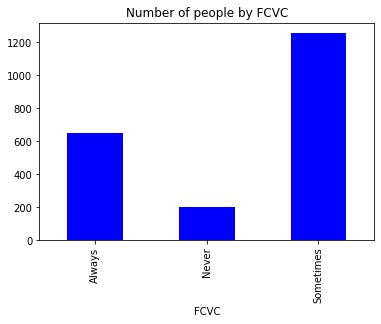

In [119]:
#Répartition des individus suivant la colonne "fcvc2"
fcvc_obesite_dataset_count = fcvc_obesite_dataset.groupby(["FCVC"]).FCVC.count().plot(kind="bar",title="Number of people by FCVC",color="blue")

On remarque que le groupe le plus représenté est celui qui mange de temps en temps des légumes et celui le moins représenté est celui qui ne mange jamais des légumes.

In [120]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_fcvc_obesite_dataset= fcvc_obesite_dataset.groupby(["FCVC", "NObeyesdad"]).FCVC.count().reset_index(name="nombre")
result_fcvc_obesite_dataset['nombre']=result_fcvc_obesite_dataset['nombre'].astype('float')
result_fcvc_obesite_dataset

,FCVC,NObeyesdad,nombre
0,Always,Insufficient_Weight,83.0
1,Always,Normal_Weight,114.0
2,Always,Obesity_Type_I,27.0
3,Always,Obesity_Type_II,25.0
4,Always,Obesity_Type_III,324.0
5,Always,Overweight_Level_I,40.0
6,Always,Overweight_Level_II,39.0
7,Never,Insufficient_Weight,37.0
8,Never,Normal_Weight,18.0
9,Never,Obesity_Type_I,33.0


In [121]:
# Pourcentage de la colonne "FCVC" en fonction de la colonne "NObeyesdad"

tt_1 =0
tt_2 = 0
tt_3 = 0

for k in range(0,7):
  tt_1 += result_fcvc_obesite_dataset['nombre'][k]
for k in range(7,13):
  tt_2 += result_fcvc_obesite_dataset['nombre'][k]
for k in range(13,19):
  tt_3 += result_fcvc_obesite_dataset['nombre'][k]


for i in range(0,7):
  result_fcvc_obesite_dataset['nombre'][i] =   (result_fcvc_obesite_dataset['nombre'][i] /tt_1 )*100
for i in range(7,13):
  result_fcvc_obesite_dataset['nombre'][i] =   (result_fcvc_obesite_dataset['nombre'][i] /tt_2 )*100
for i in range(13,19):
  result_fcvc_obesite_dataset['nombre'][i] =   (result_fcvc_obesite_dataset['nombre'][i] /tt_3 )*100


result_fcvc_obesite_dataset= result_fcvc_obesite_dataset.groupby(["FCVC","NObeyesdad"]).nombre.sum()
result_fcvc_obesite_dataset.unstack()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FCVC,,,,,,,
Always,12.730061,17.484663,4.141104,3.834356,49.693252,6.134969,5.981595
Never,18.316832,8.910891,16.336634,24.752475,NaN,18.316832,13.366337
Sometimes,12.092283,12.330947,23.150358,17.661098,NaN,16.945107,17.820207


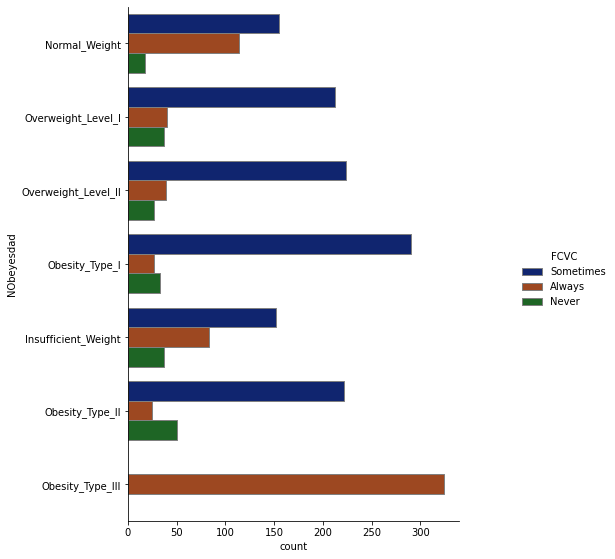

In [122]:
# Représentation graphique du nombre d'individus selon "FCVC" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="FCVC", kind="count", palette="dark", edgecolor=".5",data=fcvc_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

observations :

*   les personnes mangeant des légumes à chaque repas sont essentiellement obèses de type 3 (près de la moitié), ou ont une corpulence saine
*   plus de la moitié des personnes ne mangeant jamais de légumes ont une corpulence normale



In [123]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "FCVC"
result_fcvc_obesite_dataset= fcvc_obesite_dataset.groupby(["FCVC","NObeyesdad"]).FCVC.count().reset_index(name="nombre")
result_fcvc_obesite_dataset['nombre']=result_fcvc_obesite_dataset['nombre'].astype('float')
datatemp=result_fcvc_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["FCVC","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FCVC,,,,,,,
Always,83.0,114.0,27.0,25.0,324.0,40.0,39.0
Never,37.0,18.0,33.0,50.0,NaN,37.0,27.0
Sometimes,152.0,155.0,291.0,222.0,NaN,213.0,224.0


observations :

*   les obèses de type 3 mangent tous des légumes à chaque repas
*   la plupart des personnes en surpoids ou obèses (hors type 3) mangent des légumes de temps en temps

On remarque donc que la consommation de légume ne permet pas de déterminer la corpulence d'un individu. Chose néanmoins important à souligner, 100% des individus en obésité de type 3 mangent toujours des légumes avec leur repas. Cette observation semble contradictoire, contre intuitive avec ce que l'on pourrait penser hors de ce dataset. Nous estimons que cette "bizarrerie" s'explique par les données synthétiques. En effet à l'origine il y avait vraiment très peu de personnes en obésité de type 3 qui ont pu servir de modèle pour les données synthétiques relatives à cette classification. S'il se trouve que les quelques personnes ayant servi de modèle consomment toutes des légumes (Always), les données synthétiques ont reproduit ce résultat sans nuances.
Nous pensons donc que ce 100% est dû à une anomalie statistique dans les données de l'enquête. Il est fort probable que ces "anomalies" aient impacté d'autres classifications dans une moindre mesure (là ou il y avait peu de données extraites du réel). 


###Nombre de repas quotidiens

In [124]:
#Récupération de la colonne à analyser
ncp_obesite_dataset = data[['NCP','NObeyesdad']]

#Conversion de la colonne NCP en entier car en float64 le groupby suivant entraine des erreurs d'arrondis et ensuite en string pour pouvoir appeler la colonne
ncp_obesite_dataset['NCP']=ncp_obesite_dataset['NCP'].astype('int')
ncp_obesite_dataset['NCP']=ncp_obesite_dataset['NCP'].astype('str')
ncp_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NCP,NObeyesdad
0,3,Normal_Weight
1,3,Normal_Weight
2,3,Normal_Weight
3,3,Overweight_Level_I
4,1,Overweight_Level_II
...,...,...
2106,3,Obesity_Type_III
2107,3,Obesity_Type_III
2108,3,Obesity_Type_III
2109,3,Obesity_Type_III


In [125]:
#Renomage des valeurs numériques selon les valeurs de l'étude (cf Partie 1)
for i in range(0,len(ncp_obesite_dataset)):
  if (ncp_obesite_dataset['NCP'][i] == "1"):
    ncp_obesite_dataset['NCP'][i]="Between 1 y 2"
  if (ncp_obesite_dataset['NCP'][i]== "2"):
    ncp_obesite_dataset['NCP'][i]="Three"
  if (ncp_obesite_dataset['NCP'][i] == "3" or ncp_obesite_dataset['NCP'][i] == "4" ):
    ncp_obesite_dataset['NCP'][i]="More than three"
 
ncp_obesite_dataset

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,NCP,NObeyesdad
0,More than three,Normal_Weight
1,More than three,Normal_Weight
2,More than three,Normal_Weight
3,More than three,Overweight_Level_I
4,Between 1 y 2,Overweight_Level_II
...,...,...
2106,More than three,Obesity_Type_III
2107,More than three,Obesity_Type_III
2108,More than three,Obesity_Type_III
2109,More than three,Obesity_Type_III


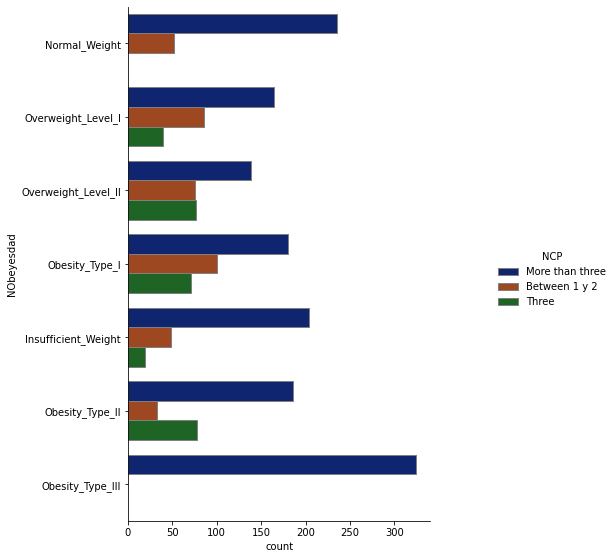

In [126]:
# Représentation graphique du nombre d'individus selon "NCP" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="NCP", kind="count", palette="dark", edgecolor=".5",data=ncp_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [127]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_ncp_obesite_dataset= ncp_obesite_dataset.groupby(["NCP","NObeyesdad"]).NCP.count().reset_index(name="nombre")
result_ncp_obesite_dataset['nombre']=result_ncp_obesite_dataset['nombre'].astype('float')
result_ncp_obesite_dataset

,NCP,NObeyesdad,nombre
0,Between 1 y 2,Insufficient_Weight,49.0
1,Between 1 y 2,Normal_Weight,52.0
2,Between 1 y 2,Obesity_Type_I,100.0
3,Between 1 y 2,Obesity_Type_II,33.0
4,Between 1 y 2,Overweight_Level_I,86.0
5,Between 1 y 2,Overweight_Level_II,75.0
6,More than three,Insufficient_Weight,204.0
7,More than three,Normal_Weight,235.0
8,More than three,Obesity_Type_I,180.0
9,More than three,Obesity_Type_II,186.0


In [128]:
#Conversion en pourcentage
tt_1 = 0
tt_2 = 0
tt_3 = 0


for k in range(0,6):
  tt_1 += result_ncp_obesite_dataset["nombre"][k]
for k in range(6,13):
  tt_2 += result_ncp_obesite_dataset["nombre"][k]
for k in range(13,18):
  tt_3 += result_ncp_obesite_dataset["nombre"][k]



for i in range(0,6):
  result_ncp_obesite_dataset["nombre"][i] =   round((result_ncp_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(6,13):
  result_ncp_obesite_dataset["nombre"][i] =   round((result_ncp_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(13, 18):
  result_ncp_obesite_dataset["nombre"][i] =   round((result_ncp_obesite_dataset["nombre"][i] /tt_3 )*100,2)



result_ncp_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,NCP,NObeyesdad,nombre
0,Between 1 y 2,Insufficient_Weight,12.41
1,Between 1 y 2,Normal_Weight,13.16
2,Between 1 y 2,Obesity_Type_I,25.32
3,Between 1 y 2,Obesity_Type_II,8.35
4,Between 1 y 2,Overweight_Level_I,21.77
5,Between 1 y 2,Overweight_Level_II,18.99
6,More than three,Insufficient_Weight,14.26
7,More than three,Normal_Weight,16.42
8,More than three,Obesity_Type_I,12.58
9,More than three,Obesity_Type_II,13.00


In [129]:
# Répartion des individus suivant la colonne "NCP"
tt_p = tt_1 + tt_2 + tt_3 
df_nbrepas = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100]},index = ['Between 1 y 2', 'More than three','Three'])
df_nbrepas

,Nombre,Pourcentage
Between 1 y 2,395.0,18.711511
More than three,1431.0,67.787778
Three,285.0,13.500711


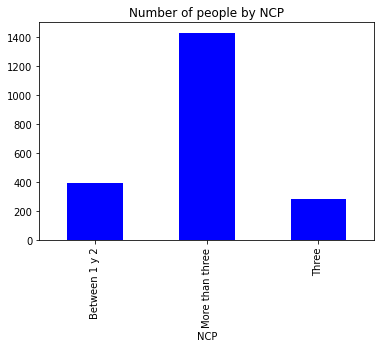

In [130]:
# Répartion des individus suivant la colonne "NCP" (graphique)
ncp_obesite_dataset_count = ncp_obesite_dataset.groupby(["NCP"]).NCP.count().plot(kind="bar",title="Number of people by NCP",color="blue")

In [131]:
# Pourcentage de la colonne "NCP" en fonction de la colonne "NObeyesdad"
result_ncp_obesite_dataset= result_ncp_obesite_dataset.groupby(["NCP","NObeyesdad"]).nombre.sum()
result_ncp_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
NCP,,,,,,,
Between 1 y 2,12.41,13.16,25.32,8.35,NaN,21.77,18.99
More than three,14.26,16.42,12.58,13.00,22.64,11.46,9.64
Three,6.67,NaN,24.91,27.37,NaN,14.04,27.02


In [132]:
#Récupération de la colonne à analyser
ncp_obesite_dataset = data[['NCP','NObeyesdad']]

In [133]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "NCP"
result_ncp_obesite_dataset= ncp_obesite_dataset.groupby(["NCP","NObeyesdad"]).NCP.count().reset_index(name="nombre")
result_ncp_obesite_dataset['nombre']=result_ncp_obesite_dataset['nombre'].astype('float')
datatemp=result_ncp_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["NCP","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
NCP,,,,,,,
1.000000,26.0,52.0,35.0,4.0,NaN,56.0,26.0
1.000283,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1.000414,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1.000610,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1.001383,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3.995957,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3.998618,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3.998766,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Au niveau du nombre de repas, on remarque dans un premier temps que cette partie du dataset se compose majoritairement de personnes prenant plus de 3 repas (67% des données). L'analyse des différentes répartitions montre que les personnes ayant les corpulences les plus élevés prennent en grande majorité plus de 3 repas. Néanmoins il ne semble pas possible d'affirmer qu'un nombre de repas plus faible tende vers les corpulences les plus faible (par exemple 81% des personnes ayant un poids normal prennent plus de 3 repas).
On peut donc estimer que le facteur nombre de repas n'est pas parlant seul afin de déterminer la condition physique d'une personne. On ne peut seulement en tirer qu'il est rare d'etre en obésité de type 2 ou 3 en prenant moins de 3 repas par jour.

### Grignotage entre les repas

In [134]:
#Récupération de la colonne à analyser
caec_obesite_dataset = data[['CAEC','NObeyesdad']]
caec_obesite_dataset

,CAEC,NObeyesdad
0,Sometimes,Normal_Weight
1,Sometimes,Normal_Weight
2,Sometimes,Normal_Weight
3,Sometimes,Overweight_Level_I
4,Sometimes,Overweight_Level_II
...,...,...
2106,Sometimes,Obesity_Type_III
2107,Sometimes,Obesity_Type_III
2108,Sometimes,Obesity_Type_III
2109,Sometimes,Obesity_Type_III


In [135]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_caec_obesite_dataset= caec_obesite_dataset.groupby(["CAEC","NObeyesdad"]).CAEC.count().reset_index(name="nombre")
result_caec_obesite_dataset['nombre']=result_caec_obesite_dataset['nombre'].astype('float')
result_caec_obesite_dataset

,CAEC,NObeyesdad,nombre
0,Always,Insufficient_Weight,2.0
1,Always,Normal_Weight,35.0
2,Always,Obesity_Type_I,6.0
3,Always,Obesity_Type_II,2.0
4,Always,Overweight_Level_I,5.0
5,Always,Overweight_Level_II,3.0
6,Frequently,Insufficient_Weight,121.0
7,Frequently,Normal_Weight,83.0
8,Frequently,Obesity_Type_I,6.0
9,Frequently,Obesity_Type_II,1.0


In [136]:
#Conversion en pourcentage
tt_1 = 0
tt_2 = 0
tt_3 = 0
tt_4 = 0

for k in range(0,6):
  tt_1 += result_caec_obesite_dataset["nombre"][k]
for k in range(6,13):
  tt_2 += result_caec_obesite_dataset["nombre"][k]
for k in range(13,20):
  tt_3 += result_caec_obesite_dataset["nombre"][k]
for k in range(20,26):
  tt_4 += result_caec_obesite_dataset["nombre"][k]


for i in range(0,6):
  result_caec_obesite_dataset["nombre"][i] =   round((result_caec_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(6,13):
  result_caec_obesite_dataset["nombre"][i] =   round((result_caec_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(13, 20):
  result_caec_obesite_dataset["nombre"][i] =   round((result_caec_obesite_dataset["nombre"][i] /tt_3 )*100,2)
for i in range(20, 26):
  result_caec_obesite_dataset["nombre"][i] =   round((result_caec_obesite_dataset["nombre"][i] /tt_4 )*100,2)


result_caec_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to b

,CAEC,NObeyesdad,nombre
0,Always,Insufficient_Weight,3.77
1,Always,Normal_Weight,66.04
2,Always,Obesity_Type_I,11.32
3,Always,Obesity_Type_II,3.77
4,Always,Overweight_Level_I,9.43
5,Always,Overweight_Level_II,5.66
6,Frequently,Insufficient_Weight,50.00
7,Frequently,Normal_Weight,34.30
8,Frequently,Obesity_Type_I,2.48
9,Frequently,Obesity_Type_II,0.41


In [137]:
# Répartion des individus suivant la colonne "CAEC"
tt_p = tt_1 + tt_2 + tt_3 + tt_4
df_caec = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3,tt_4],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100,tt_4/tt_p*100]},index = ['Always', 'Frequently', 'Sometimes', 'no'])
df_caec

,Nombre,Pourcentage
Always,53.0,2.510658
Frequently,242.0,11.463761
Sometimes,1765.0,83.609664
no,51.0,2.415917


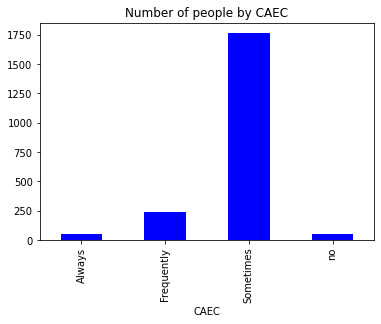

In [138]:
# Répartion des individus suivant la colonne "CAEC" (graphique)
caec_obesite_dataset_count = caec_obesite_dataset.groupby(["CAEC"]).CAEC.count().plot(kind="bar",title="Number of people by CAEC",color="blue")

On remarque que la grande majorité (83%) des individus grignote entre les repas de temps en temps.

In [139]:
# Pourcentage de la colonne "CAEC" en fonction de la colonne "NObeyesdad"
result_caec_obesite_dataset= result_caec_obesite_dataset.groupby(["CAEC","NObeyesdad"]).nombre.sum()
result_caec_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,3.77,66.04,11.32,3.77,NaN,9.43,5.66
Frequently,50.00,34.30,2.48,0.41,0.41,5.79,6.61
Sometimes,8.27,9.01,19.15,16.60,18.30,13.37,15.30
no,5.88,19.61,1.96,1.96,NaN,68.63,1.96


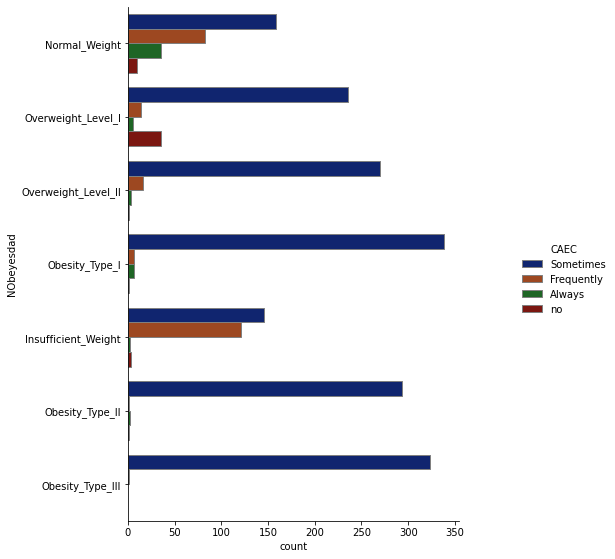

In [140]:
# Représentation graphique du nombre d'individus selon "CAEC" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="CAEC", kind="count", palette="dark", edgecolor=".5",data=caec_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [141]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "CAEC"
result_caec_obesite_dataset= caec_obesite_dataset.groupby(["CAEC","NObeyesdad"]).CAEC.count().reset_index(name="nombre")
result_caec_obesite_dataset['nombre']=result_caec_obesite_dataset['nombre'].astype('float')
datatemp=result_caec_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["CAEC","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,2.0,35.0,6.0,2.0,NaN,5.0,3.0
Frequently,121.0,83.0,6.0,1.0,1.0,14.0,16.0
Sometimes,146.0,159.0,338.0,293.0,323.0,236.0,270.0
no,3.0,10.0,1.0,1.0,NaN,35.0,1.0


On remarque que les personnes ne grignotant jamais ne sont presque pas concernées par l'obésité et même le surpoid de type 2. On remarque aussi que les personnes concernées par l'obésité grignotent de temps en temps.
Attention la faible représentation des catégories à l'exception de "Sometimes" rend particulièrement compliquée l'interprêtation des liens de cause à effet de ces catégories sur la corpulence. Il semble donc que sur le dataset exploité le grignotage ne soit pas à lui seul en mesure d'influencer la corpulence. On peut néanmoins penser à une influence minime, notamment pour identifier les personnes qui n'iraient pas au delà du surpoids de type 1

###Consommation quotidienne d'eau

In [142]:
#Récupération de la colonne à analyser
ch2o_obesite_dataset = data[['CH2O','NObeyesdad']]
ch2o_obesite_dataset

,CH2O,NObeyesdad
0,2.000000,Normal_Weight
1,3.000000,Normal_Weight
2,2.000000,Normal_Weight
3,2.000000,Overweight_Level_I
4,2.000000,Overweight_Level_II
...,...,...
2106,1.728139,Obesity_Type_III
2107,2.005130,Obesity_Type_III
2108,2.054193,Obesity_Type_III
2109,2.852339,Obesity_Type_III


In [143]:
#Renommage des valeur numériques selon les valeurs de l'étude (cf Partie 1)
for i in range(0,len(ch2o_obesite_dataset)):
  if (ch2o_obesite_dataset['CH2O'][i] < 1 ):
    ch2o_obesite_dataset['CH2O'][i]="Less than a liter"
  else:
    if (1<ch2o_obesite_dataset['CH2O'][i]<= 2):
      ch2o_obesite_dataset['CH2O'][i]="Between 1 and 2 L"
    else:
      ch2o_obesite_dataset['CH2O'][i]="More than 2 L"
 
ch2o_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/usr/local/lib/python3.6/d

,CH2O,NObeyesdad
0,Between 1 and 2 L,Normal_Weight
1,More than 2 L,Normal_Weight
2,Between 1 and 2 L,Normal_Weight
3,Between 1 and 2 L,Overweight_Level_I
4,Between 1 and 2 L,Overweight_Level_II
...,...,...
2106,Between 1 and 2 L,Obesity_Type_III
2107,More than 2 L,Obesity_Type_III
2108,More than 2 L,Obesity_Type_III
2109,More than 2 L,Obesity_Type_III


In [144]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_ch2o_obesite_dataset= ch2o_obesite_dataset.groupby(["CH2O","NObeyesdad"]).CH2O.count().reset_index(name="nombre")
result_ch2o_obesite_dataset['nombre']=result_ch2o_obesite_dataset['nombre'].astype('float')
result_ch2o_obesite_dataset

,CH2O,NObeyesdad,nombre
0,Between 1 and 2 L,Insufficient_Weight,148.0
1,Between 1 and 2 L,Normal_Weight,164.0
2,Between 1 and 2 L,Obesity_Type_I,154.0
3,Between 1 and 2 L,Obesity_Type_II,112.0
4,Between 1 and 2 L,Obesity_Type_III,110.0
5,Between 1 and 2 L,Overweight_Level_I,142.0
6,Between 1 and 2 L,Overweight_Level_II,176.0
7,More than 2 L,Insufficient_Weight,124.0
8,More than 2 L,Normal_Weight,123.0
9,More than 2 L,Obesity_Type_I,197.0


In [145]:
tt_1 = 0
tt_2 = 0

for k in range(0,7):
  tt_1 += result_ch2o_obesite_dataset["nombre"][k]
for k in range(7,14):
  tt_2 += result_ch2o_obesite_dataset["nombre"][k]




for i in range(0,7):
  result_ch2o_obesite_dataset["nombre"][i] =   round((result_ch2o_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,14):
  result_ch2o_obesite_dataset["nombre"][i] =   round((result_ch2o_obesite_dataset["nombre"][i] /tt_2 )*100,2)



result_ch2o_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,CH2O,NObeyesdad,nombre
0,Between 1 and 2 L,Insufficient_Weight,14.71
1,Between 1 and 2 L,Normal_Weight,16.30
2,Between 1 and 2 L,Obesity_Type_I,15.31
3,Between 1 and 2 L,Obesity_Type_II,11.13
4,Between 1 and 2 L,Obesity_Type_III,10.93
5,Between 1 and 2 L,Overweight_Level_I,14.12
6,Between 1 and 2 L,Overweight_Level_II,17.50
7,More than 2 L,Insufficient_Weight,11.22
8,More than 2 L,Normal_Weight,11.13
9,More than 2 L,Obesity_Type_I,17.83


In [146]:
# Répartion des individus suivant la colonne "CH2O"
tt_p = tt_1 + tt_2  
df_nblitre = pd.DataFrame({'Nombre': [0,tt_1, tt_2],'Pourcentage': [0,tt_1/tt_p*100, tt_2/tt_p*100]},index = ['Less than a liter', 'Between 1 and 2 L', 'More than 2 L'])
df_nblitre

,Nombre,Pourcentage
Less than a liter,0.0,0.00000
Between 1 and 2 L,1006.0,47.65514
More than 2 L,1105.0,52.34486


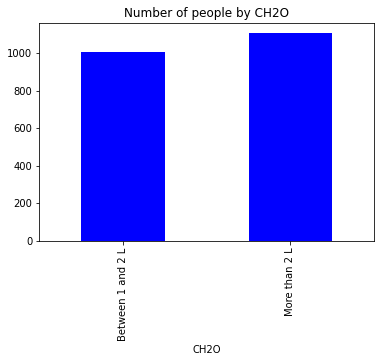

In [147]:
# Répartion des individus suivant la colonne "CH2O" (graphique)
ch2o_obesite_dataset_count = ch2o_obesite_dataset.groupby(["CH2O"]).CH2O.count().plot(kind="bar",title="Number of people by CH2O",color="blue")

On remarque qu'auncun indivvidu boit moins d'un litre d'eau par jour. Sinon entre les 2 autres cathégories on peut voir que c'est presque du 50/50.

In [148]:
# Pourcentage de la colonne "CH2O" en fonction de la colonne "NObeyesdad"
result_ch2o_obesite_dataset= result_ch2o_obesite_dataset.groupby(["CH2O","NObeyesdad"]).nombre.sum()
result_ch2o_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CH2O,,,,,,,
Between 1 and 2 L,14.71,16.30,15.31,11.13,10.93,14.12,17.50
More than 2 L,11.22,11.13,17.83,16.74,19.37,13.39,10.32


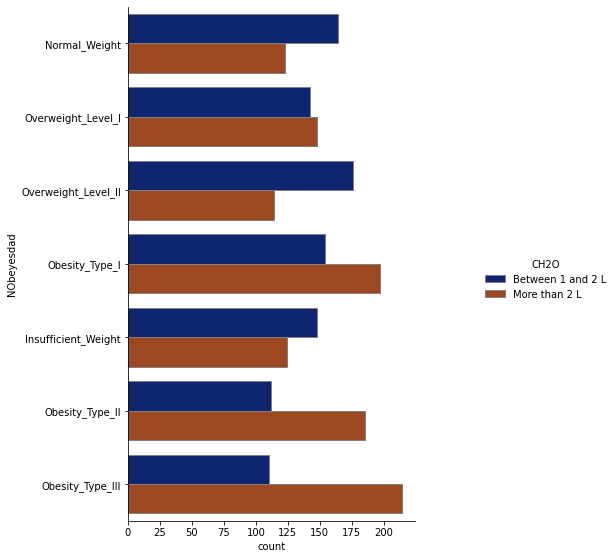

In [149]:
# Représentation graphique du nombre d'individus selon "CH2O" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="CH2O", kind="count", palette="dark", edgecolor=".5",data=ch2o_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [150]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "CH2O"
result_ch2o_obesite_dataset= ch2o_obesite_dataset.groupby(["CH2O","NObeyesdad"]).CH2O.count().reset_index(name="nombre")
result_ch2o_obesite_dataset['nombre']=result_ch2o_obesite_dataset['nombre'].astype('float')
datatemp=result_ch2o_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["CH2O","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CH2O,,,,,,,
Between 1 and 2 L,148.0,164.0,154.0,112.0,110.0,142.0,176.0
More than 2 L,124.0,123.0,197.0,185.0,214.0,148.0,114.0


Au niveau de la consommation moyenne d'eau, si on compare les 2 choix avec la corpulence il ne semble pas y avoir de rapport important entre la consommation quotidienne d'eau et la corpulence des individus. On remarque en effet une distribution plutôt homogène entre les différentes corpulences des individus. Il semble tout de même y avoir une plus grande consommation d'eau chez les personnes ayant une corpulence forte.
Pour conclure on peut estimer que la consommation quotidienne d'eau semble avoir un impact relatif sur la corpulence d'un individu.

###Surveillance du nombre de calories ingérées

In [151]:
#Récupération de la colonne à analyser
scc_obesite_dataset = data[['SCC','NObeyesdad']]
scc_obesite_dataset

,SCC,NObeyesdad
0,no,Normal_Weight
1,yes,Normal_Weight
2,no,Normal_Weight
3,no,Overweight_Level_I
4,no,Overweight_Level_II
...,...,...
2106,no,Obesity_Type_III
2107,no,Obesity_Type_III
2108,no,Obesity_Type_III
2109,no,Obesity_Type_III


In [152]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_scc_obesite_dataset= scc_obesite_dataset.groupby(["SCC","NObeyesdad"]).SCC.count().reset_index(name="nombre")
result_scc_obesite_dataset['nombre']=result_scc_obesite_dataset['nombre'].astype('float')
result_scc_obesite_dataset

,SCC,NObeyesdad,nombre
0,no,Insufficient_Weight,250.0
1,no,Normal_Weight,257.0
2,no,Obesity_Type_I,349.0
3,no,Obesity_Type_II,296.0
4,no,Obesity_Type_III,324.0
5,no,Overweight_Level_I,253.0
6,no,Overweight_Level_II,286.0
7,yes,Insufficient_Weight,22.0
8,yes,Normal_Weight,30.0
9,yes,Obesity_Type_I,2.0


In [153]:
tt_1 = 0
tt_2 = 0


for k in range(0,7):
  tt_1 += result_scc_obesite_dataset["nombre"][k]
for k in range(7,13):
  tt_2 += result_scc_obesite_dataset["nombre"][k]




for i in range(0,7):
  result_scc_obesite_dataset["nombre"][i] =   round((result_scc_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,13):
  result_scc_obesite_dataset["nombre"][i] =   round((result_scc_obesite_dataset["nombre"][i] /tt_2 )*100,2)


result_scc_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,SCC,NObeyesdad,nombre
0,no,Insufficient_Weight,12.41
1,no,Normal_Weight,12.75
2,no,Obesity_Type_I,17.32
3,no,Obesity_Type_II,14.69
4,no,Obesity_Type_III,16.08
5,no,Overweight_Level_I,12.56
6,no,Overweight_Level_II,14.19
7,yes,Insufficient_Weight,22.92
8,yes,Normal_Weight,31.25
9,yes,Obesity_Type_I,2.08


In [154]:
# Répartion des individus suivant la colonne "SCC"
tt_p = tt_1 + tt_2 
df_scc = pd.DataFrame({'Nombre': [tt_1, tt_2],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100]},index = ['no', 'yes'])
df_scc

,Nombre,Pourcentage
no,2015.0,95.452392
yes,96.0,4.547608


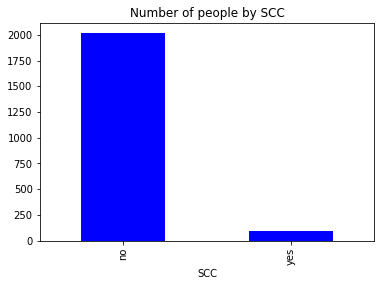

In [155]:
# Répartion des individus suivant la colonne "SCC" (graphique)
scc_obesite_dataset_count = scc_obesite_dataset.groupby(["SCC"]).SCC.count().plot(kind="bar",title="Number of people by SCC",color="blue")

In [156]:
# Pourcentage de la colonne "SCC" en fonction de la colonne "NObeyesdad"
result_scc_obesite_dataset= result_scc_obesite_dataset.groupby(["SCC","NObeyesdad"]).nombre.sum()
result_scc_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,12.41,12.75,17.32,14.69,16.08,12.56,14.19
yes,22.92,31.25,2.08,1.04,NaN,38.54,4.17


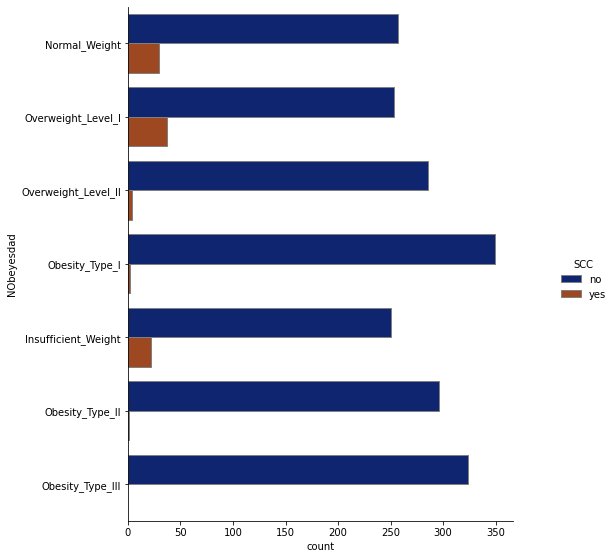

In [157]:
# Représentation graphique du nombre d'individus selon "SCC" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="SCC", kind="count", palette="dark", edgecolor=".5",data=scc_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [158]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "SCC"
result_scc_obesite_dataset= scc_obesite_dataset.groupby(["SCC","NObeyesdad"]).SCC.count().reset_index(name="nombre")
result_scc_obesite_dataset['nombre']=result_scc_obesite_dataset['nombre'].astype('float')
datatemp=result_scc_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["SCC","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,250.0,257.0,349.0,296.0,324.0,253.0,286.0
yes,22.0,30.0,2.0,1.0,NaN,37.0,4.0


D'apres l'observation des données relatives à la surveillance du nombre de calories ingérées. On peut remarquer que la grande majorité des individus du dataset ne surveillent pas le nombre de calories ingérées (95,5%). Néanmoins on peut remarquer que pour les gens qui surveillent le nombre de calories cela a une influence sur leur corpulence. Ceux qui surveillent ont tendance à avoir une corpulence qui ne dépasse pas le surpoids de niveau 1 (Overweight_Level_I).
On peut donc conclure que ce paramètre a bien une influence à lui seul sur la corpulence des individue (si positif).

###Fréquence moyenne de la pratique d'une activité physique

In [159]:
#Récupération de la colonne à analyser
faf_obesite_dataset = data[['FAF','NObeyesdad']]

#Conversion de la colonne FAF en entier (arrondi pour créé une classification) puis en str pour en faire une étiquette de colonne pour la suite
faf_obesite_dataset['FAF']=faf_obesite_dataset['FAF'].astype('int')
faf_obesite_dataset['FAF']=faf_obesite_dataset['FAF'].astype('str')
faf_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FAF,NObeyesdad
0,0,Normal_Weight
1,3,Normal_Weight
2,2,Normal_Weight
3,2,Overweight_Level_I
4,0,Overweight_Level_II
...,...,...
2106,1,Obesity_Type_III
2107,1,Obesity_Type_III
2108,1,Obesity_Type_III
2109,1,Obesity_Type_III


In [160]:
#Renommage des valeur numérique selon les valeurs de l'étude (cf Partie 1)
for i in range(0,len(faf_obesite_dataset)):
  if (faf_obesite_dataset['FAF'][i] == "0" ):
    faf_obesite_dataset['FAF'][i]="I do not have"
  if (faf_obesite_dataset['FAF'][i]== "1"):
      faf_obesite_dataset['FAF'][i]="1 or 2 days"
  if (faf_obesite_dataset['FAF'][i]== "2"):
      faf_obesite_dataset['FAF'][i]="2 or 4 days"
  if (faf_obesite_dataset['FAF'][i]== "3"):
      faf_obesite_dataset['FAF'][i]="4 or 5 days"
 
faf_obesite_dataset

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,FAF,NObeyesdad
0,I do not have,Normal_Weight
1,4 or 5 days,Normal_Weight
2,2 or 4 days,Normal_Weight
3,2 or 4 days,Overweight_Level_I
4,I do not have,Overweight_Level_II
...,...,...
2106,1 or 2 days,Obesity_Type_III
2107,1 or 2 days,Obesity_Type_III
2108,1 or 2 days,Obesity_Type_III
2109,1 or 2 days,Obesity_Type_III


In [161]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_faf_obesite_dataset= faf_obesite_dataset.groupby(["FAF","NObeyesdad"]).FAF.count().reset_index(name="nombre")
result_faf_obesite_dataset['nombre']=result_faf_obesite_dataset['nombre'].astype('float')
result_faf_obesite_dataset

,FAF,NObeyesdad,nombre
0,1 or 2 days,Insufficient_Weight,64.0
1,1 or 2 days,Normal_Weight,97.0
2,1 or 2 days,Obesity_Type_I,114.0
3,1 or 2 days,Obesity_Type_II,143.0
4,1 or 2 days,Obesity_Type_III,116.0
5,1 or 2 days,Overweight_Level_I,89.0
6,1 or 2 days,Overweight_Level_II,101.0
7,2 or 4 days,Insufficient_Weight,95.0
8,2 or 4 days,Normal_Weight,69.0
9,2 or 4 days,Obesity_Type_I,48.0


In [162]:
tt_1 = 0
tt_2 = 0
tt_3 = 0
tt_4 = 0

for k in range(0,7):
  tt_1 += result_faf_obesite_dataset["nombre"][k]
for k in range(7,14):
  tt_2 += result_faf_obesite_dataset["nombre"][k]
for k in range(14,19):
  tt_3 += result_faf_obesite_dataset["nombre"][k]
for k in range(19,26):
  tt_4 += result_faf_obesite_dataset["nombre"][k]


for i in range(0,7):
  result_faf_obesite_dataset["nombre"][i] =   round((result_faf_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,14):
  result_faf_obesite_dataset["nombre"][i] =   round((result_faf_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(14, 19):
  result_faf_obesite_dataset["nombre"][i] =   round((result_faf_obesite_dataset["nombre"][i] /tt_3 )*100,2)
for i in range(19, 26):
  result_faf_obesite_dataset["nombre"][i] =   round((result_faf_obesite_dataset["nombre"][i] /tt_4 )*100,2)


result_faf_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to b

,FAF,NObeyesdad,nombre
0,1 or 2 days,Insufficient_Weight,8.84
1,1 or 2 days,Normal_Weight,13.40
2,1 or 2 days,Obesity_Type_I,15.75
3,1 or 2 days,Obesity_Type_II,19.75
4,1 or 2 days,Obesity_Type_III,16.02
5,1 or 2 days,Overweight_Level_I,12.29
6,1 or 2 days,Overweight_Level_II,13.95
7,2 or 4 days,Insufficient_Weight,31.56
8,2 or 4 days,Normal_Weight,22.92
9,2 or 4 days,Obesity_Type_I,15.95


In [163]:
# Répartion des individus suivant la colonne "FAF"
tt_p = tt_1 + tt_2 + tt_3 + tt_4
df_faf = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3,tt_4],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100,tt_4/tt_p*100]},index = ['1 or 2 days','2 or 4 days', '4 or 5 days', 'I do not have'])
df_faf

,Nombre,Pourcentage
1 or 2 days,724.0,34.296542
2 or 4 days,301.0,14.258645
4 or 5 days,75.0,3.552819
I do not have,1011.0,47.891994


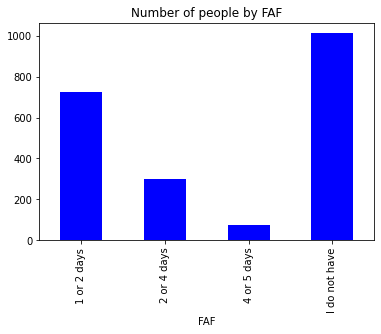

In [164]:
# Répartion des individus suivant la colonne "FAF" (graphique)
faf_obesite_dataset_count = faf_obesite_dataset.groupby(["FAF"]).FAF.count().plot(kind="bar",title="Number of people by FAF",color="blue")

In [165]:
# Pourcentage de la colonne "FAF" en fonction de la colonne "NObeyesdad"
result_faf_obesite_dataset= result_faf_obesite_dataset.groupby(["FAF","NObeyesdad"]).nombre.sum()
result_faf_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAF,,,,,,,
1 or 2 days,8.84,13.40,15.75,19.75,16.02,12.29,13.95
2 or 4 days,31.56,22.92,15.95,1.66,0.33,16.61,10.96
4 or 5 days,5.33,54.67,17.33,NaN,NaN,13.33,9.33
I do not have,10.78,7.91,17.41,14.74,20.47,13.95,14.74


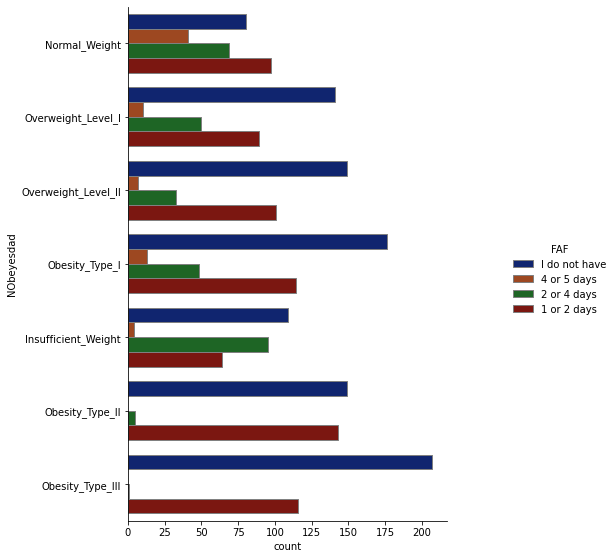

In [166]:
# Représentation graphique du nombre d'individu selon "FAF" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="FAF", kind="count", palette="dark", edgecolor=".5",data=faf_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [167]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "FAF"
result_faf_obesite_dataset= faf_obesite_dataset.groupby(["FAF","NObeyesdad"]).FAF.count().reset_index(name="nombre")
result_faf_obesite_dataset['nombre']=result_faf_obesite_dataset['nombre'].astype('float')
datatemp=result_faf_obesite_dataset

for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)


datatemp= datatemp.groupby(["FAF","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAF,,,,,,,
1 or 2 days,64.0,97.0,114.0,143.0,116.0,89.0,101.0
2 or 4 days,95.0,69.0,48.0,5.0,1.0,50.0,33.0
4 or 5 days,4.0,41.0,13.0,NaN,NaN,10.0,7.0
I do not have,109.0,80.0,176.0,149.0,207.0,141.0,149.0


D'après l'observation des données on peut remarquer que presque la moitié des individus ne pratiquent pas d'activité physique (42%).
On remarque également une corrélation évidente entre la fréquence moyenne de la pratique d'une activité physique et la corpulence. Plus la fréquence d'activité physique est élevée et plus la corpulence tend vers un poids normal.
On peut donc conclure que le paramètre "fréquence moyenne de la pratique d'une activité physique" influence à lui seul la corpulence d'un individu.

###Temps d'utilisation d'objets électroniques

In [168]:
#Récupération de la colonne à analyser
tue_obesite_dataset = data[['TUE','NObeyesdad']]

#Conversion de la colonne TUE en entier (arrondi pour créé une classification) puis en str pour en faire une étiquette de colonne pour la suite
tue_obesite_dataset['TUE']=tue_obesite_dataset['TUE'].astype('int')
tue_obesite_dataset['TUE']=tue_obesite_dataset['TUE'].astype('str')
tue_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TUE,NObeyesdad
0,1,Normal_Weight
1,0,Normal_Weight
2,1,Normal_Weight
3,0,Overweight_Level_I
4,0,Overweight_Level_II
...,...,...
2106,0,Obesity_Type_III
2107,0,Obesity_Type_III
2108,0,Obesity_Type_III
2109,0,Obesity_Type_III


In [169]:
#Renommage des valeur numérique selon les valeurs de l'étude (cf Partie 1)
for i in range(0,len(tue_obesite_dataset)):
  if (tue_obesite_dataset['TUE'][i] == "0" ):
    tue_obesite_dataset['TUE'][i]="Between 0 and 2h"
  if (tue_obesite_dataset['TUE'][i]== "1"):
      tue_obesite_dataset['TUE'][i]="Between 3 and 5h"
  if (tue_obesite_dataset['TUE'][i]== "2"):
      tue_obesite_dataset['TUE'][i]="More than 5h"
 
tue_obesite_dataset

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,TUE,NObeyesdad
0,Between 3 and 5h,Normal_Weight
1,Between 0 and 2h,Normal_Weight
2,Between 3 and 5h,Normal_Weight
3,Between 0 and 2h,Overweight_Level_I
4,Between 0 and 2h,Overweight_Level_II
...,...,...
2106,Between 0 and 2h,Obesity_Type_III
2107,Between 0 and 2h,Obesity_Type_III
2108,Between 0 and 2h,Obesity_Type_III
2109,Between 0 and 2h,Obesity_Type_III


In [170]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_tue_obesite_dataset= tue_obesite_dataset.groupby(["TUE","NObeyesdad"]).TUE.count().reset_index(name="nombre")
result_tue_obesite_dataset['nombre']=result_tue_obesite_dataset['nombre'].astype('float')
result_tue_obesite_dataset

,TUE,NObeyesdad,nombre
0,Between 0 and 2h,Insufficient_Weight,133.0
1,Between 0 and 2h,Normal_Weight,129.0
2,Between 0 and 2h,Obesity_Type_I,221.0
3,Between 0 and 2h,Obesity_Type_II,231.0
4,Between 0 and 2h,Obesity_Type_III,312.0
5,Between 0 and 2h,Overweight_Level_I,204.0
6,Between 0 and 2h,Overweight_Level_II,185.0
7,Between 3 and 5h,Insufficient_Weight,120.0
8,Between 3 and 5h,Normal_Weight,122.0
9,Between 3 and 5h,Obesity_Type_I,105.0


In [171]:
tt_1 = 0
tt_2 = 0
tt_3 = 0


for k in range(0,7):
  tt_1 += result_tue_obesite_dataset["nombre"][k]
for k in range(7,14):
  tt_2 += result_tue_obesite_dataset["nombre"][k]
for k in range(14,19):
  tt_3 += result_tue_obesite_dataset["nombre"][k]



for i in range(0,7):
  result_tue_obesite_dataset["nombre"][i] =   round((result_tue_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,14):
  result_tue_obesite_dataset["nombre"][i] =   round((result_tue_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(14, 19):
  result_tue_obesite_dataset["nombre"][i] =   round((result_tue_obesite_dataset["nombre"][i] /tt_3 )*100,2)


result_tue_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TUE,NObeyesdad,nombre
0,Between 0 and 2h,Insufficient_Weight,9.40
1,Between 0 and 2h,Normal_Weight,9.12
2,Between 0 and 2h,Obesity_Type_I,15.62
3,Between 0 and 2h,Obesity_Type_II,16.33
4,Between 0 and 2h,Obesity_Type_III,22.05
5,Between 0 and 2h,Overweight_Level_I,14.42
6,Between 0 and 2h,Overweight_Level_II,13.07
7,Between 3 and 5h,Insufficient_Weight,20.44
8,Between 3 and 5h,Normal_Weight,20.78
9,Between 3 and 5h,Obesity_Type_I,17.89


In [172]:
# Répartion des individus suivant la colonne "TUE"
tt_p = tt_1 + tt_2 + tt_3 
df_tue = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100]},index = ['Between 0 and 2h', 'Between 3 and 5h', 'More than 5h'])
df_tue

,Nombre,Pourcentage
Between 0 and 2h,1415.0,67.380952
Between 3 and 5h,587.0,27.952381
More than 5h,98.0,4.666667


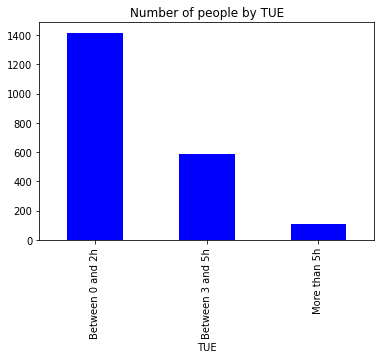

In [173]:
# Répartion des individus suivant la colonne "TUE" (graphique)
tue_obesite_dataset_count = tue_obesite_dataset.groupby(["TUE"]).TUE.count().plot(kind="bar",title="Number of people by TUE",color="blue")

On remarque que la majorité des individus passe entre 0 et 2h devant des écrans électronique. Vraiment très peu de personnes y passe plus de 5h.

In [174]:
# Pourcentage de la colonne "TUE" en fonction de la colonne "NObeyesdad"
result_tue_obesite_dataset= result_tue_obesite_dataset.groupby(["TUE","NObeyesdad"]).nombre.sum()
result_tue_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
TUE,,,,,,,
Between 0 and 2h,9.40,9.12,15.62,16.33,22.05,14.42,13.07
Between 3 and 5h,20.44,20.78,17.89,10.90,2.04,11.93,16.01
More than 5h,19.39,36.73,25.51,2.04,NaN,16.33,11.00


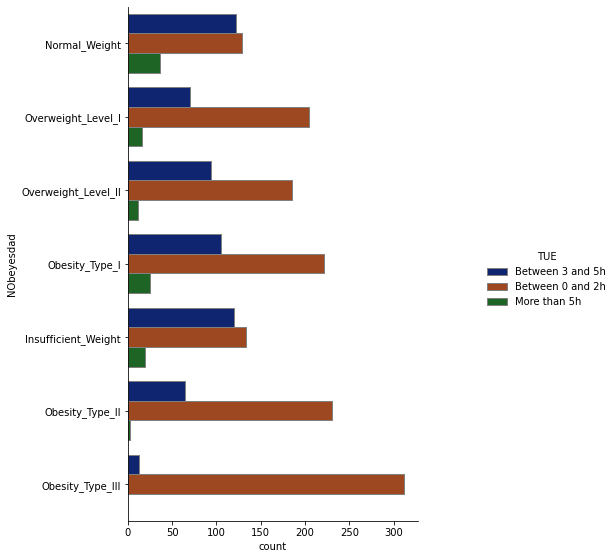

In [175]:
# Représentation graphique du nombre d'individus selon "TUE" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="TUE", kind="count", palette="dark", edgecolor=".5",data=tue_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [176]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "TUE"
result_tue_obesite_dataset= tue_obesite_dataset.groupby(["TUE","NObeyesdad"]).TUE.count().reset_index(name="nombre")
result_tue_obesite_dataset['nombre']=result_tue_obesite_dataset['nombre'].astype('float')
datatemp=result_tue_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["TUE","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
TUE,,,,,,,
Between 0 and 2h,133.0,129.0,221.0,231.0,312.0,204.0,185.0
Between 3 and 5h,120.0,122.0,105.0,64.0,12.0,70.0,94.0
More than 5h,19.0,36.0,25.0,2.0,NaN,16.0,11.0


D'apres l'observation des données relatives au temps d'utilisation des objets électronique, on peut remarquer que la plupart des personnes obèses ou en surpoids utilisent très peu les objets électroniques. Encore une fois cela semble contre intuitif (cf explication pour la consommation de légumes)
Attention toutefois, la répartition des individus suivant ce critère n'est pas du tout homogène. Il semble donc que se critère ne puisse pas être utilisé en l'état pour classifier efficacement les corpulences.

###Consommation d'alcool

In [177]:
#Récupération de la colonne à analyser
calc_obesite_dataset = data[['CALC','NObeyesdad']]
calc_obesite_dataset

,CALC,NObeyesdad
0,no,Normal_Weight
1,Sometimes,Normal_Weight
2,Frequently,Normal_Weight
3,Frequently,Overweight_Level_I
4,Sometimes,Overweight_Level_II
...,...,...
2106,Sometimes,Obesity_Type_III
2107,Sometimes,Obesity_Type_III
2108,Sometimes,Obesity_Type_III
2109,Sometimes,Obesity_Type_III


In [178]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_calc_obesite_dataset= calc_obesite_dataset.groupby(["CALC","NObeyesdad"]).CALC.count().reset_index(name="nombre")
result_calc_obesite_dataset['nombre']=result_calc_obesite_dataset['nombre'].astype('float')
result_calc_obesite_dataset

,CALC,NObeyesdad,nombre
0,Always,Normal_Weight,1.0
1,Frequently,Insufficient_Weight,1.0
2,Frequently,Normal_Weight,18.0
3,Frequently,Obesity_Type_I,14.0
4,Frequently,Obesity_Type_II,2.0
5,Frequently,Overweight_Level_I,16.0
6,Frequently,Overweight_Level_II,19.0
7,Sometimes,Insufficient_Weight,154.0
8,Sometimes,Normal_Weight,161.0
9,Sometimes,Obesity_Type_I,172.0


In [179]:
tt_1 = 0
tt_2 = 0
tt_3 = 0
tt_4 = 0

for k in range(0,1):
  tt_1 += result_calc_obesite_dataset["nombre"][k]
for k in range(1,7):
  tt_2 += result_calc_obesite_dataset["nombre"][k]
for k in range(7,14):
  tt_3 += result_calc_obesite_dataset["nombre"][k]
for k in range(14,21):
  tt_4 += result_calc_obesite_dataset["nombre"][k]


for i in range(0,1):
  result_calc_obesite_dataset["nombre"][i] =   round((result_calc_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(1,7):
  result_calc_obesite_dataset["nombre"][i] =   round((result_calc_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(7,14):
  result_calc_obesite_dataset["nombre"][i] =   round((result_calc_obesite_dataset["nombre"][i] /tt_3 )*100,2)
for i in range(14, 21):
  result_calc_obesite_dataset["nombre"][i] =   round((result_calc_obesite_dataset["nombre"][i] /tt_4 )*100,2)



result_calc_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to b

,CALC,NObeyesdad,nombre
0,Always,Normal_Weight,100.00
1,Frequently,Insufficient_Weight,1.43
2,Frequently,Normal_Weight,25.71
3,Frequently,Obesity_Type_I,20.00
4,Frequently,Obesity_Type_II,2.86
5,Frequently,Overweight_Level_I,22.86
6,Frequently,Overweight_Level_II,27.14
7,Sometimes,Insufficient_Weight,10.99
8,Sometimes,Normal_Weight,11.49
9,Sometimes,Obesity_Type_I,12.28


In [180]:
# Répartion des individus suivant la colonne "CALC"
tt_p = tt_1 + tt_2 + tt_3 +tt_4
df_alcool = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3,tt_4],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100,tt_4/tt_p*100]},index = ['Always', 'Frequently', 'Sometimes', 'no'])
df_alcool

,Nombre,Pourcentage
Always,1.0,0.047371
Frequently,70.0,3.315964
Sometimes,1401.0,66.366651
no,639.0,30.270014


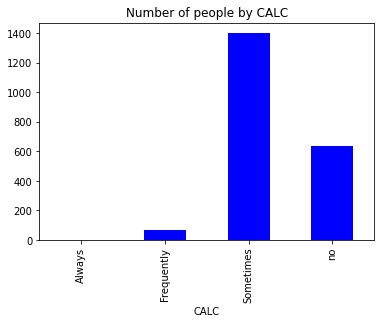

In [181]:
# Répartion des individus suivant la colonne "CALC"
calc_obesite_dataset_count = calc_obesite_dataset.groupby(["CALC"]).CALC.count().plot(kind="bar",title="Number of people by CALC",color="blue")

In [182]:
# Pourcentage de la colonne "CALC" en fonction de la colonne "NObeyesdad"
result_calc_obesite_dataset= result_calc_obesite_dataset.groupby(["CALC","NObeyesdad"]).nombre.sum()
result_calc_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,NaN,100.00,NaN,NaN,NaN,NaN,NaN
Frequently,1.43,25.71,20.00,2.86,NaN,22.86,27.14
Sometimes,10.99,11.49,12.28,15.99,23.05,15.99,10.21
no,18.31,16.74,25.82,11.11,0.16,7.82,20.03


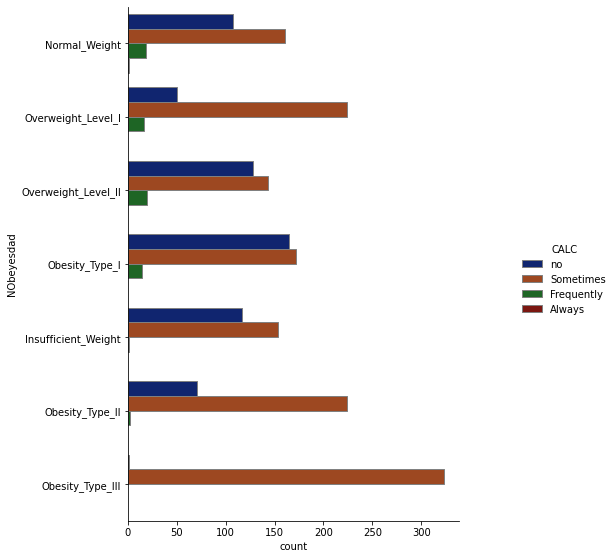

In [183]:
# Représentation graphique du nombre d'individus selon "CALC" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="CALC", kind="count", palette="dark", edgecolor=".5",data=calc_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [184]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "CALC"
result_calc_obesite_dataset= calc_obesite_dataset.groupby(["CALC","NObeyesdad"]).CALC.count().reset_index(name="nombre")
result_calc_obesite_dataset['nombre']=result_calc_obesite_dataset['nombre'].astype('float')
datatemp=result_calc_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["CALC","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Frequently,1.0,18.0,14.0,2.0,NaN,16.0,19.0
Sometimes,154.0,161.0,172.0,224.0,323.0,224.0,143.0
no,117.0,107.0,165.0,71.0,1.0,50.0,128.0


D'après l'observation des données relatives à la consommation d'alcool, on peut déjà remarquer que les données ne comportent qu'un seul individu ayant répondu qu'il consomme toujours de l'alcool. On ne pourra donc tirer aucune tendance de la classification "Always". Pour ce qui est des autres classifications la majorité des individu consomment de temps en temps de l'alcool (66%), une autre partie conséquente n'en consomme pas (30%) et enfin une petite partie en consomme fréquement (3%).
Il semble difficile de dégager un lien entre la consommation d'alcool et la corpulence.

###Fumeur

In [185]:
#Récupération de la colonne à analyser
smoke_obesite_dataset = data[['SMOKE','NObeyesdad']]
smoke_obesite_dataset

,SMOKE,NObeyesdad
0,no,Normal_Weight
1,yes,Normal_Weight
2,no,Normal_Weight
3,no,Overweight_Level_I
4,no,Overweight_Level_II
...,...,...
2106,no,Obesity_Type_III
2107,no,Obesity_Type_III
2108,no,Obesity_Type_III
2109,no,Obesity_Type_III


In [186]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_smoke_obesite_dataset= smoke_obesite_dataset.groupby(["SMOKE","NObeyesdad"]).SMOKE.count().reset_index(name="nombre")
result_smoke_obesite_dataset['nombre']=result_smoke_obesite_dataset['nombre'].astype('float')
result_smoke_obesite_dataset

,SMOKE,NObeyesdad,nombre
0,no,Insufficient_Weight,271.0
1,no,Normal_Weight,274.0
2,no,Obesity_Type_I,345.0
3,no,Obesity_Type_II,282.0
4,no,Obesity_Type_III,323.0
5,no,Overweight_Level_I,287.0
6,no,Overweight_Level_II,285.0
7,yes,Insufficient_Weight,1.0
8,yes,Normal_Weight,13.0
9,yes,Obesity_Type_I,6.0


In [187]:
tt_1 = 0
tt_2 = 0


for k in range(0,7):
  tt_1 += result_smoke_obesite_dataset["nombre"][k]
for k in range(7,14):
  tt_2 += result_smoke_obesite_dataset["nombre"][k]




for i in range(0,7):
  result_smoke_obesite_dataset["nombre"][i] =   round((result_smoke_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,14):
  result_smoke_obesite_dataset["nombre"][i] =   round((result_smoke_obesite_dataset["nombre"][i] /tt_2 )*100,2)

result_smoke_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,SMOKE,NObeyesdad,nombre
0,no,Insufficient_Weight,13.11
1,no,Normal_Weight,13.26
2,no,Obesity_Type_I,16.69
3,no,Obesity_Type_II,13.64
4,no,Obesity_Type_III,15.63
5,no,Overweight_Level_I,13.88
6,no,Overweight_Level_II,13.79
7,yes,Insufficient_Weight,2.27
8,yes,Normal_Weight,29.55
9,yes,Obesity_Type_I,13.64


In [188]:
# Répartion des individus suivant la colonne "SMOKE"
tt_p = tt_1 + tt_2 
df_nbsmoke = pd.DataFrame({'Nombre': [tt_1, tt_2],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100]},index = ['non fumeur', 'fumeur'])
df_nbsmoke

,Nombre,Pourcentage
non fumeur,2067.0,97.91568
fumeur,44.0,2.08432


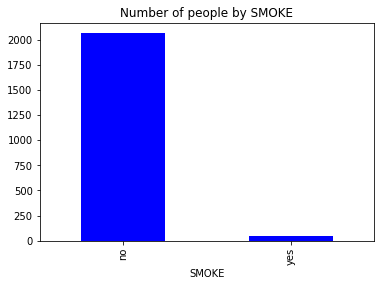

In [189]:
# Répartion des individus suivant la colonne "SMOKE"
smoke_obesite_dataset_count = smoke_obesite_dataset.groupby(["SMOKE"]).SMOKE.count().plot(kind="bar",title="Number of people by SMOKE",color="blue")

In [190]:
# Pourcentage de la colonne "SMOKE" en fonction de la colonne "NObeyesdad"
result_smoke_obesite_dataset= result_smoke_obesite_dataset.groupby(["SMOKE","NObeyesdad"]).nombre.sum()
result_smoke_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,13.11,13.26,16.69,13.64,15.63,13.88,13.79
yes,2.27,29.55,13.64,34.09,2.27,6.82,11.36


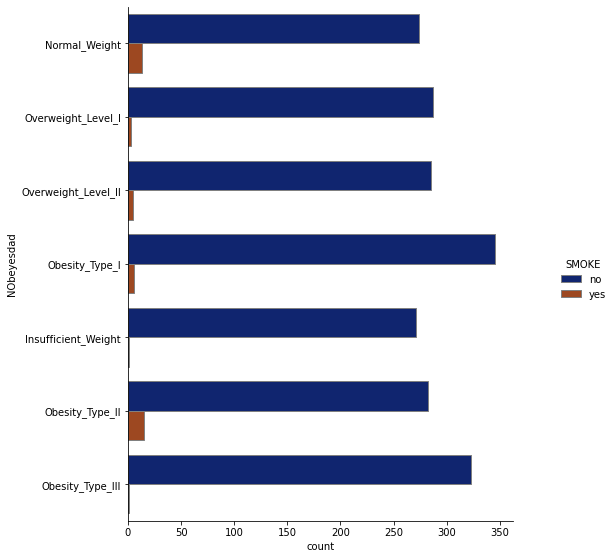

In [191]:
# Représentation graphique du nombre d'individus selon "SMOKE" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="SMOKE", kind="count", palette="dark", edgecolor=".5",data=smoke_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [192]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "SMOKE"
result_smoke_obesite_dataset= smoke_obesite_dataset.groupby(["SMOKE","NObeyesdad"]).SMOKE.count().reset_index(name="nombre")
result_smoke_obesite_dataset['nombre']=result_smoke_obesite_dataset['nombre'].astype('float')
datatemp=result_smoke_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["SMOKE","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,271.0,274.0,345.0,282.0,323.0,287.0,285.0
yes,1.0,13.0,6.0,15.0,1.0,3.0,5.0


D'après les données on peut voir que la très grande majorité des personnes sont non fumeures dans le dataset (97%).
Il semble donc compliqué de dégager une tendance de corpulence suivant le paramètre fumeur compte tenu du très faible échantillon de personnes fumeures (44 personnes).
La répartion des corpulences suivant ce paramètre n'est d'ailleur pas sinificative d'une certaine tendance.
On peut donc conclure qu'en l'état des données le paramètre "fumeur ou non" ne semble pas influencer à lui seul la corpulence des individus.

###Moyen de transport usuel

In [193]:
#Récupération de la colonne à analyser
mtrans_obesite_dataset = data[['MTRANS','NObeyesdad']]
mtrans_obesite_dataset

,MTRANS,NObeyesdad
0,Public_Transportation,Normal_Weight
1,Public_Transportation,Normal_Weight
2,Public_Transportation,Normal_Weight
3,Walking,Overweight_Level_I
4,Public_Transportation,Overweight_Level_II
...,...,...
2106,Public_Transportation,Obesity_Type_III
2107,Public_Transportation,Obesity_Type_III
2108,Public_Transportation,Obesity_Type_III
2109,Public_Transportation,Obesity_Type_III


In [194]:
#On regroupe suivant les colonnes et compte le nombre d'individus dans chaque cas
result_mtrans_obesite_dataset= mtrans_obesite_dataset.groupby(["MTRANS","NObeyesdad"]).MTRANS.count().reset_index(name="nombre")
result_mtrans_obesite_dataset['nombre']=result_mtrans_obesite_dataset['nombre'].astype('float')
result_mtrans_obesite_dataset

,MTRANS,NObeyesdad,nombre
0,Automobile,Insufficient_Weight,46.0
1,Automobile,Normal_Weight,45.0
2,Automobile,Obesity_Type_I,110.0
3,Automobile,Obesity_Type_II,95.0
4,Automobile,Obesity_Type_III,1.0
5,Automobile,Overweight_Level_I,66.0
6,Automobile,Overweight_Level_II,94.0
7,Bike,Normal_Weight,4.0
8,Bike,Obesity_Type_II,1.0
9,Bike,Overweight_Level_I,2.0


In [195]:
tt_1 = 0
tt_2 = 0
tt_3 = 0
tt_4 = 0
tt_5 = 0

for k in range(0,7):
  tt_1 += result_mtrans_obesite_dataset["nombre"][k]
for k in range(7,10):
  tt_2 += result_mtrans_obesite_dataset["nombre"][k]
for k in range(10,14):
  tt_3 += result_mtrans_obesite_dataset["nombre"][k]
for k in range(14,21):
  tt_4 += result_mtrans_obesite_dataset["nombre"][k]
for k in range(21,27):
  tt_5 += result_mtrans_obesite_dataset["nombre"][k]

for i in range(0,7):
  result_mtrans_obesite_dataset["nombre"][i] =   round((result_mtrans_obesite_dataset["nombre"][i] /tt_1 )*100,2)
for i in range(7,10):
  result_mtrans_obesite_dataset["nombre"][i] =   round((result_mtrans_obesite_dataset["nombre"][i] /tt_2 )*100,2)
for i in range(10,14):
  result_mtrans_obesite_dataset["nombre"][i] =   round((result_mtrans_obesite_dataset["nombre"][i] /tt_3 )*100,2)
for i in range(14, 21):
  result_mtrans_obesite_dataset["nombre"][i] =   round((result_mtrans_obesite_dataset["nombre"][i] /tt_4 )*100,2)
for i in range(21, 27):
  result_mtrans_obesite_dataset["nombre"][i] =   round((result_mtrans_obesite_dataset["nombre"][i] /tt_5 )*100,2)


result_mtrans_obesite_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to b

,MTRANS,NObeyesdad,nombre
0,Automobile,Insufficient_Weight,10.07
1,Automobile,Normal_Weight,9.85
2,Automobile,Obesity_Type_I,24.07
3,Automobile,Obesity_Type_II,20.79
4,Automobile,Obesity_Type_III,0.22
5,Automobile,Overweight_Level_I,14.44
6,Automobile,Overweight_Level_II,20.57
7,Bike,Normal_Weight,57.14
8,Bike,Obesity_Type_II,14.29
9,Bike,Overweight_Level_I,28.57


In [196]:
# Répartion des individus suivant la colonne "MTRANS"
tt_p = tt_1 + tt_2 + tt_3 + tt_4 + tt_5
df_nbsmoke = pd.DataFrame({'Nombre': [tt_1, tt_2,tt_3, tt_4, tt_5],'Pourcentage': [tt_1/tt_p*100, tt_2/tt_p*100,tt_3/tt_p*100, tt_4/tt_p*100, tt_5/tt_p*100]},index = ['Automobile', 'Bike','Motorbike','Public_Transportation','Walking'])
df_nbsmoke

,Nombre,Pourcentage
Automobile,457.0,21.648508
Bike,7.0,0.331596
Motorbike,11.0,0.521080
Public_Transportation,1580.0,74.846045
Walking,56.0,2.652771


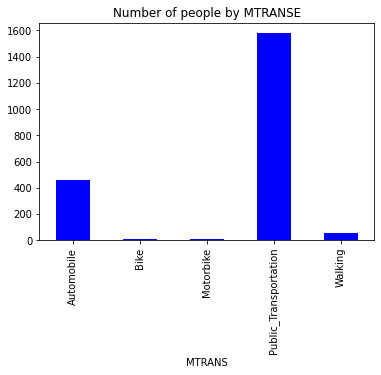

In [197]:
# Répartion des individus suivant la colonne "MTRANS"
mtrans_obesite_dataset_count = mtrans_obesite_dataset.groupby(["MTRANS"]).MTRANS.count().plot(kind="bar",title="Number of people by MTRANSE",color="blue")

In [198]:
# Pourcentage de la colonne "MTRANS" en fonction de la colonne "NObeyesdad"
result_mtrans_obesite_dataset= result_mtrans_obesite_dataset.groupby(["MTRANS","NObeyesdad"]).nombre.sum()
result_mtrans_obesite_dataset.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,10.07,9.85,24.07,20.79,0.22,14.44,20.57
Bike,NaN,57.14,NaN,14.29,NaN,28.57,NaN
Motorbike,NaN,54.55,27.27,NaN,NaN,9.09,9.09
Public_Transportation,13.92,12.66,14.94,12.66,20.44,13.42,11.96
Walking,10.71,57.14,3.57,1.79,NaN,16.07,10.71


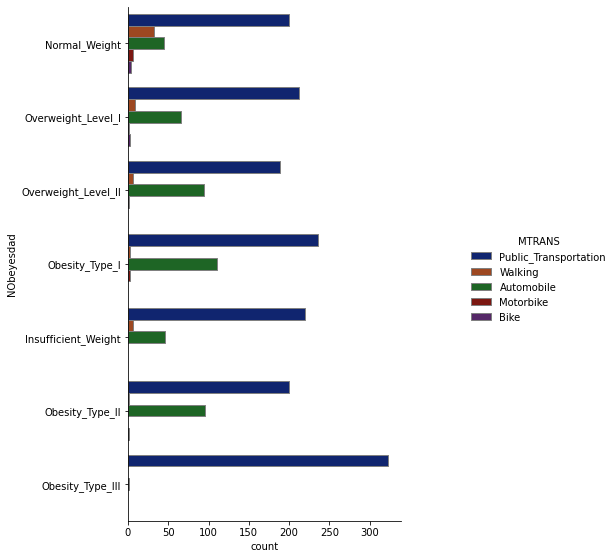

In [199]:
# Représentation graphique du nombre d'individus selon "MTRANS" en fonction de la colonne "NObeyesdad"
graph = seaborn.catplot(y="NObeyesdad", hue="MTRANS", kind="count", palette="dark", edgecolor=".5",data=mtrans_obesite_dataset)
graph.fig.set_figwidth(10)
graph.fig.set_figheight(8)

In [200]:
# Pourcentage de la colonne "NObeyesdad" en fonction de la colonne "MTRANS"
result_mtrans_obesite_dataset= mtrans_obesite_dataset.groupby(["MTRANS","NObeyesdad"]).MTRANS.count().reset_index(name="nombre")
result_mtrans_obesite_dataset['nombre']=result_mtrans_obesite_dataset['nombre'].astype('float')
datatemp=result_mtrans_obesite_dataset
for k in range(0,len(datatemp)):
  if(datatemp['NObeyesdad'][k]=='1 - Insufficient_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[0] )*100,2)
  if(datatemp['NObeyesdad'][k]=='2 - Normal_Weight'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[1] )*100,2)
  if(datatemp['NObeyesdad'][k]=='3 - Overweight_Level_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[2] )*100,2)
  if(datatemp['NObeyesdad'][k]=='4 - Overweight_Level_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[3] )*100,2)
  if(datatemp['NObeyesdad'][k]=='5 - Obesity_Type_I'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[4] )*100,2)
  if(datatemp['NObeyesdad'][k]=='6 - Obesity_Type_II'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[5] )*100,2)
  if(datatemp['NObeyesdad'][k]=='7 - Obesity_Type_III'):
    datatemp['nombre'][k]= round((datatemp["nombre"][k] /result_corpulence_obesite_dataset[6] )*100,2)

datatemp= datatemp.groupby(["MTRANS","NObeyesdad"]).nombre.sum()
datatemp.unstack()

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,46.0,45.0,110.0,95.0,1.0,66.0,94.0
Bike,NaN,4.0,NaN,1.0,NaN,2.0,NaN
Motorbike,NaN,6.0,3.0,NaN,NaN,1.0,1.0
Public_Transportation,220.0,200.0,236.0,200.0,323.0,212.0,189.0
Walking,6.0,32.0,2.0,1.0,NaN,9.0,6.0


D'après les données on peut voir une grande disparité entre les différents modes de locomotion. Les transports publics et la voiture sont les 2 principaux modes de locomotions (97% à eux deux).
On remarque que les gens utilisant un moyen de transport non motorisé (Walking,Bike) sont beaucoup moins représentées dans les catégories "obésité". Il est aussi important de noter que la catégorie "Motorbike" n'est pas représentée pour une obésité de type 2 et 3.
Il semble donc y avoir une influence du type de locomotion sur la corpulence d'un individu. 


##Conclusion partie III

On peut en déduire d'après les analyses effectuées que  

> les indicateurs de corpulence les plus pertinents sont : 
*   les antécédents familiaux
*   la consommation de nourriture calorique
*   la surveillance du nombre de calories ingérées
*   la pratique d'une activité physique
*   le moyen de transport usuel  

> les indicateurs de corpulence qui semblent avoir une influence moindre sont :   
* le sexe de l'individu
* Nombre de repas quotidiens
* Grignotage entre les repas
* Consommation quotidienne d'eau



> les indicateurs de corpulence qui ne semblent pas avoir d'influence sont :  
*  Age
*  Consommation de légumes
*  Temps d'utilisation d'objets électroniques
*  Consommation d'alcool
*  Fumeur

A partir de cette classification on peut imaginer créer plusieurs modèles différents de machine learning suivant l'utilisation ou non des différentes variables. (cf partie 5)   
On pourra alors savoir si effectivement certaines colonnes ne sont pas utiles ou si au contraire elles ont bien une influence (peut-être combinées avec d'autres).

###Notes importantes

L'analyse des colonnes à révélé des biais importants dans le dataset utilisé. Ces biais proviennent des 77% de données synthétiques. On a montré à 2 reprises (variables "TUE" (temps passé devant un écran) et "FCVC" (consommation de légumes pendant les repas)) des résultats contre intuitifs. Après vérification auprès d'études scientifiques les gens atteints par l'obésité auraient plutôt tendance à ne pas manger de légumes et à passer beaucoup de temps devant des écrans. Pourtant notre dataset semble prouver le contraire. Il semble donc bien y avoir eu une amplification d'un biais statistique lors de la création des données synthétique. Cela est  lié à la faible représentation des personnes atteintes par des formes graves d'obésité dans l'enquête réalisée.  

Ce phénomène n'empêchera pas de créer un modèle de machine learning performant sur le dataset d'étude. Néanmoins il est fort probable que ce modèle présente de réelles difficultés en présence d'un autre dataset ne présentant pas les erreurs statistiques. Afin d'éviter au mieux ce phénomème il semble important d'éviter d'etrainer un modèle de machine learning avec les variables posant le plus de problèmes. Donc ne pas utilisier les variables "TUE" et "FCVC".


#PARTIE IV : Préparation du Dataset pour les modèles de Machine Learning

##Pre processing

Comme nous avons pu le voir lors de l'importation des données et de l'analyse des différentes colonnes dans la partie précédentes certaines colonnes nécéssitent d'etre modifiées pour être analysées et surtout pour pouvoir créer un modèle de machine learning.

###1.1) conversion des string en int

il est nécessaire de convertir absolument toutes les colonnes de type string en nombres afin d'appliquer des modèles de prédiction

In [53]:
#gender devient à présent une variable binaire (0 pour female et 1 pour male)
def genderToInt():
  for k in range(0,len(data)):
    if (data['Gender'][k]=='Female'):
      data['Gender'][k]=0
    else:
      data['Gender'][k]=1

#certaines variables étaient déjà binaires mais au format string (yes/no). elles sont converties en int
def yesNoToInt():
  for k in range(0, len(data)):
    if (data['family_history_with_overweight'][k] == 'no'):
      data['family_history_with_overweight'][k] = 0
    else:
      data['family_history_with_overweight'][k] = 1

    if (data['FAVC'][k] == 'no'):
      data['FAVC'][k] = 0
    else:
      data['FAVC'][k] = 1
    
    if (data['SMOKE'][k] == 'no'):
      data['SMOKE'][k] = 0
    else:
      data['SMOKE'][k] = 1

    if (data['SCC'][k] == 'no'):
      data['SCC'][k] = 0
    else:
      data['SCC'][k] = 1

# ces 2 colonnes n'ont que 4 valeurs possibles : no, sometimes, frequently et always, nous les avons respectivement transformées en 0, 1, 2, 3
def CaecCalcToInt():
  for k in range(0,len(data)):
    if (data['CAEC'][k]=='no'):
      data['CAEC'][k]=0
    if (data['CAEC'][k]=='Sometimes'):
      data['CAEC'][k]=1
    if (data['CAEC'][k]=='Frequently'):
      data['CAEC'][k]=2
    if (data['CAEC'][k]=='Always'):
      data['CAEC'][k]=3
    
    if (data['CALC'][k]=='no'):
      data['CALC'][k]=0
    if (data['CALC'][k]=='Sometimes'):
      data['CALC'][k]=1
    if (data['CALC'][k]=='Frequently'):
      data['CALC'][k]=2
    if (data['CALC'][k]=='Always'):
      data['CALC'][k]=3

def FcvcToInt():
  data['FCVC']=data['FCVC'].astype('int')
  data['FCVC']=data['FCVC'].astype('str')

  data['NCP']=data['NCP'].astype('int')
  data['NCP']=data['NCP'].astype('str')

  data['CH2O']=data['CH2O'].astype('int')
  data['CH2O']=data['CH2O'].astype('str')

  data['FAF']=data['FAF'].astype('int')
  data['FAF']=data['FAF'].astype('str')

  data['TUE']=data['TUE'].astype('int')
  data['TUE']=data['TUE'].astype('str')



def MtransToInt():
  for k in range(0,len(data)):
    if (data['MTRANS'][k]=='Automobile'):
      data['MTRANS'][k]=0
    if (data['MTRANS'][k]=='Bike'):
      data['MTRANS'][k]=1
    if (data['MTRANS'][k]=='Motorbike'):
      data['MTRANS'][k]=2
    if (data['MTRANS'][k]=='Public_Transportation'):
      data['MTRANS'][k]=3
    if (data['MTRANS'][k] =='Walking'):
      data['MTRANS'][k]=4

def NObeyesdadToInt():
  for k in range(0,len(data)):
    if (data['NObeyesdad'][k]=='1 - Insufficient_Weight'):
      data['NObeyesdad'][k]=0
    if (data['NObeyesdad'][k]=='2 - Normal_Weight'):
      data['NObeyesdad'][k]=1
    if (data['NObeyesdad'][k]=='3 - Overweight_Level_I'):
      data['NObeyesdad'][k]=2
    if (data['NObeyesdad'][k]=='4 - Overweight_Level_II'):
      data['NObeyesdad'][k]=3
    if (data['NObeyesdad'][k] =='5 - Obesity_Type_I'):
      data['NObeyesdad'][k]=4
    if (data['NObeyesdad'][k]=='6 - Obesity_Type_II'):
      data['NObeyesdad'][k]=5
    if (data['NObeyesdad'][k] =='7 - Obesity_Type_III'):
      data['NObeyesdad'][k]=6

def strToInt():
  genderToInt()
  yesNoToInt()
  FcvcToInt()
  CaecCalcToInt()
  MtransToInt()

###1.2) préparation des datasets

In [ ]:
def separation(dataset):
  #séparation de la colonne à prédire
  
  X = dataset.drop('NObeyesdad', axis = 1)
  y = dataset['NObeyesdad']

  #séparation en train et test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return [X_train, X_test, y_train, y_test]

In [202]:
data = pd.read_csv(path + 'dataset.csv', sep=',') 
renommage()     #renomme les corpulences 
#convertit les fréquences de pratique d'activité physique en string
data['FAF']=data['FAF'].astype('int')
data['FAF']=data['FAF'].astype('str')
data = data.drop(["Height", "Weight"], axis = 1)  #supprime les colonnes taille et poids
strToInt()   #convertit toutes les variables qualitatives en int pour les modèles de prédiction
#data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib



*   data1 est le subset avec les colonnes antécédents familiaux, consommation de nourriture calorique, surveillance du nombre de calories, pratique d'une activité physique, moyen de transport usuel, et corpulence
*   data2 est le subset avec les colonnes de data1 + le genre, le nombre de repas,la consommation d'eau et le grignotage entre les repas



In [ ]:
data1 = data[['family_history_with_overweight','FAVC','SCC','FAF','MTRANS','NObeyesdad']]
data2 = data[['Gender','family_history_with_overweight','FAVC','NCP','CAEC','CH2O','SCC','FAF','MTRANS','NObeyesdad']]

#PARTIE V : Modèles de prédiction

Nous allons utiliser 7 algorithmes différents : Random forest, SVM, un réseau de neurones, Decision tree, Bagging, Gradient boosting, et knn. De plus nous allons utiliser chacun de ces algorithmes avec toutes les colonnes, mais aussi avec les subsets définis plus haut.

In [95]:
import numpy as np
import seaborn
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Les matrices de confusion générées par sklearn ne sont pas très lisibles, nous avons donc décidé de les améliorer grâce à cette méthode

In [ ]:
classes_cf = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          accuracy = None):

  #génération des données de chaque cellule
  blanks = ['' for i in range(cf.size)]

  if group_names and len(group_names)==cf.size:
    group_labels = ["{}\n".format(value) for value in group_names]
  else:
    group_labels = blanks

  if count:
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
  else:
    group_counts = blanks

  if percent:
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
  else:
    group_percentages = blanks

  box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
  

  stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)

  if figsize==None:
    figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
    categories=False


  # affichage de la matrice
  plt.figure(figsize=figsize)
  seaborn.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)
  else:
    plt.xlabel(stats_text)
  
  if title:
    plt.title(title)


## 1) 1er modèle : Random Forest

In [ ]:
def RandomForest(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  rfc = RandomForestClassifier(n_estimators=200)
  rfc.fit(X_train, y_train)
  pred_rfc = rfc.predict(X_test)

  acc = round(accuracy_score(y_test,  pred_rfc)*100, 2)
  print(classification_report(y_test, pred_rfc))
  cf = confusion_matrix(y_test, pred_rfc)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="RF CF", percent=False, accuracy=acc)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.62      0.57      0.59        56
      2 - Normal_Weight       0.48      0.24      0.32        62
 3 - Overweight_Level_I       0.32      0.32      0.32        56
4 - Overweight_Level_II       0.60      0.24      0.34        50
     5 - Obesity_Type_I       0.32      0.09      0.14        78
    6 - Obesity_Type_II       0.26      0.16      0.19        58
   7 - Obesity_Type_III       0.30      1.00      0.47        63

               accuracy                           0.37       423
              macro avg       0.41      0.37      0.34       423
           weighted avg       0.41      0.37      0.33       423



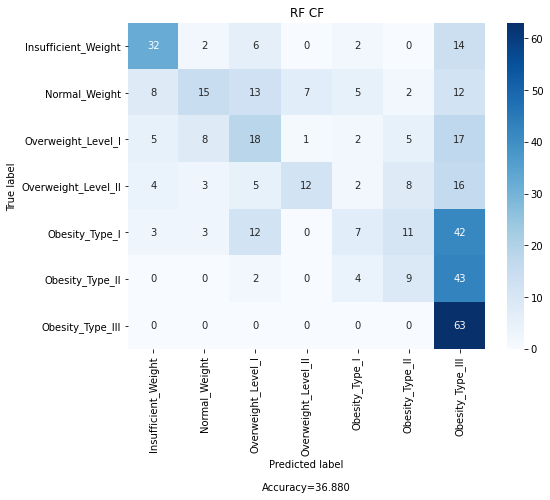

In [59]:
RandomForest(data1)

Avec une précision moyenne de 41% ce modèle n'est pas efficace en ne tenant compte que des 5 colonnes les plus significatives, surtout pour l'obésite et le surpoids

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.78      0.75      0.76        56
      2 - Normal_Weight       0.64      0.58      0.61        62
 3 - Overweight_Level_I       0.55      0.48      0.51        56
4 - Overweight_Level_II       0.41      0.52      0.46        50
     5 - Obesity_Type_I       0.56      0.56      0.56        78
    6 - Obesity_Type_II       0.63      0.69      0.66        58
   7 - Obesity_Type_III       0.95      0.89      0.92        63

               accuracy                           0.64       423
              macro avg       0.65      0.64      0.64       423
           weighted avg       0.65      0.64      0.64       423



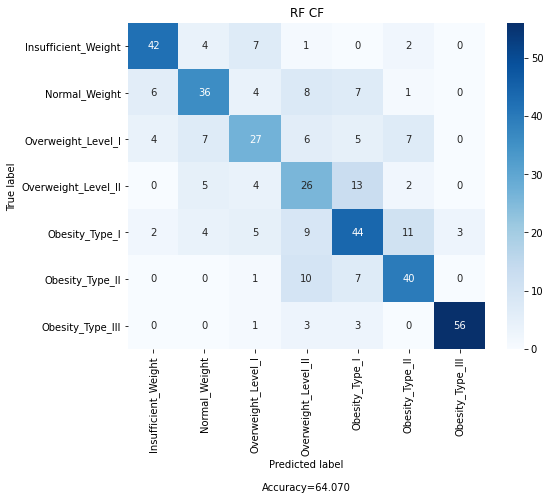

In [60]:
RandomForest(data2)

Avec une précision moyenne de 64% ce modèle est peu plus efficace en y rajoutant les 4 colonnes moyennement significatives. Cependant, étant donné l'extrême homogénéité des données sur l'obésite morbide, ces colonnes sont suffisantes pour prédire cette catégorie


                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.83      0.88      0.85        56
      2 - Normal_Weight       0.72      0.74      0.73        62
 3 - Overweight_Level_I       0.79      0.86      0.82        56
4 - Overweight_Level_II       0.95      0.72      0.82        50
     5 - Obesity_Type_I       0.84      0.83      0.84        78
    6 - Obesity_Type_II       0.89      0.93      0.91        58
   7 - Obesity_Type_III       1.00      1.00      1.00        63

               accuracy                           0.85       423
              macro avg       0.86      0.85      0.85       423
           weighted avg       0.86      0.85      0.85       423



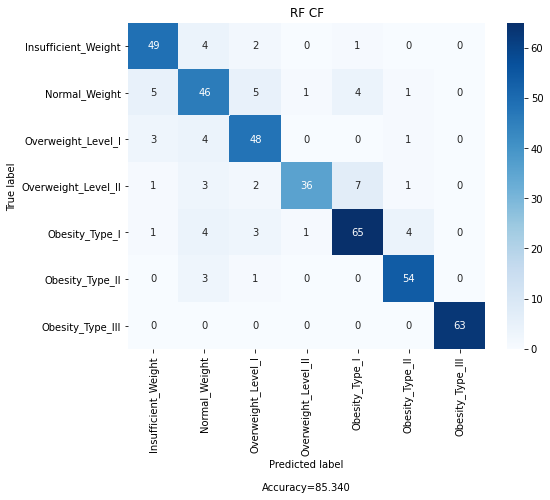

In [62]:
RandomForest(data)

avec 85% de précision, le modèle Random Forest est efficace en étant entrainé sur toutes les colonnes du dataset

## 2) 2e modèle : SVM

In [ ]:
def svm_classifier(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  clf = svm.SVC()
  clf.fit(X_train, y_train)
  pred_clf = clf.predict(X_test)
  
  acc = round(accuracy_score(y_test,  pred_clf)*100, 2)
  print(classification_report(y_test, pred_clf))
  cf = confusion_matrix(y_test, pred_clf)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="SVM CF", percent=False, accuracy=acc)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.52      0.43      0.47        56
      2 - Normal_Weight       0.46      0.42      0.44        62
 3 - Overweight_Level_I       0.62      0.14      0.23        56
4 - Overweight_Level_II       0.62      0.26      0.37        50
     5 - Obesity_Type_I       0.38      0.22      0.28        78
    6 - Obesity_Type_II       0.27      0.16      0.20        58
   7 - Obesity_Type_III       0.30      1.00      0.46        63

               accuracy                           0.38       423
              macro avg       0.45      0.37      0.35       423
           weighted avg       0.44      0.38      0.35       423



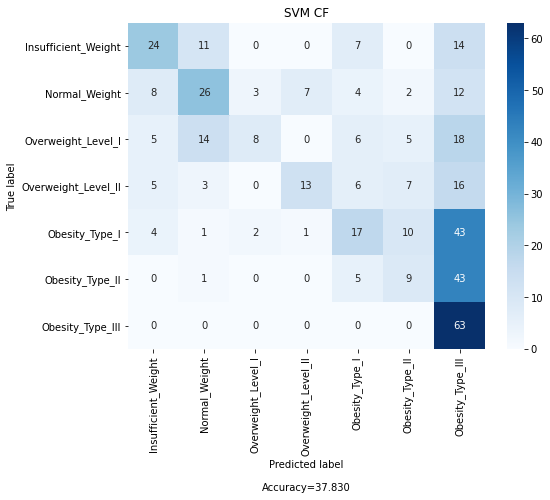

In [203]:
svm_classifier(data1)

avec 44% de précision moyenne, ce modèle non plus n'est pas efficace avec le subset data1

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.66      0.80      0.73        56
      2 - Normal_Weight       0.70      0.56      0.62        62
 3 - Overweight_Level_I       0.58      0.34      0.43        56
4 - Overweight_Level_II       0.56      0.40      0.47        50
     5 - Obesity_Type_I       0.55      0.54      0.55        78
    6 - Obesity_Type_II       0.54      0.78      0.63        58
   7 - Obesity_Type_III       0.83      1.00      0.91        63

               accuracy                           0.64       423
              macro avg       0.63      0.63      0.62       423
           weighted avg       0.63      0.64      0.62       423



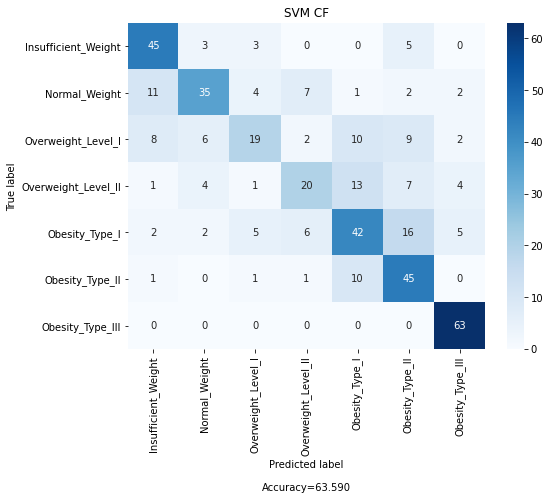

In [ ]:
svm_classifier(data2)

avec 63% de précision moyenne, ce modèle est un peu plus efficace avec le subset data2. on remarque néanmoins qu'il devient efficace pour l'obésité morbide, mais beaucoup moins que Random forest

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.80      0.88      0.84        56
      2 - Normal_Weight       0.64      0.74      0.69        62
 3 - Overweight_Level_I       0.70      0.59      0.64        56
4 - Overweight_Level_II       0.63      0.58      0.60        50
     5 - Obesity_Type_I       0.74      0.69      0.72        78
    6 - Obesity_Type_II       0.80      0.84      0.82        58
   7 - Obesity_Type_III       1.00      1.00      1.00        63

               accuracy                           0.76       423
              macro avg       0.76      0.76      0.76       423
           weighted avg       0.76      0.76      0.76       423



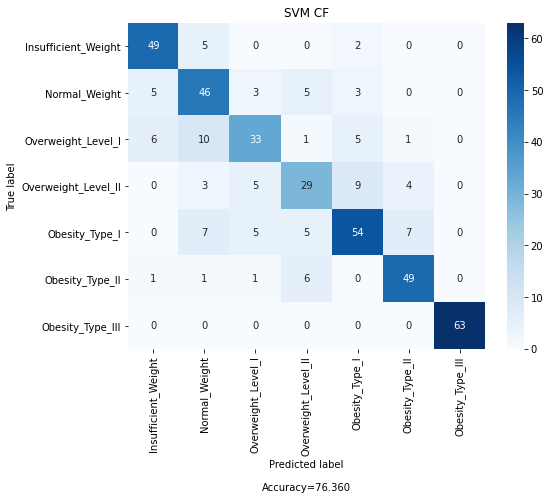

In [204]:
svm_classifier(data)

sur le dataset entier, le modèle SVM est beaucoup moins efficace que Random forest

## 3) 3e modèle : Réseau de neurones

In [ ]:
def neuralNetwork(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]
  
  mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter= 500)
  mlpc.fit(X_train, y_train)
  pred_mlpc = mlpc.predict(X_test)
  
  acc = round(accuracy_score(y_test,  pred_mlpc)*100, 2)
  print(classification_report(y_test, pred_mlpc))
  cf = confusion_matrix(y_test, pred_mlpc)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="NN CF", percent=False, accuracy=acc)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.60      0.55      0.57        56
      2 - Normal_Weight       0.56      0.37      0.45        62
 3 - Overweight_Level_I       0.31      0.21      0.25        56
4 - Overweight_Level_II       0.59      0.26      0.36        50
     5 - Obesity_Type_I       0.35      0.10      0.16        78
    6 - Obesity_Type_II       0.31      0.66      0.42        58
   7 - Obesity_Type_III       0.35      0.68      0.46        63

               accuracy                           0.40       423
              macro avg       0.44      0.41      0.38       423
           weighted avg       0.43      0.40      0.37       423



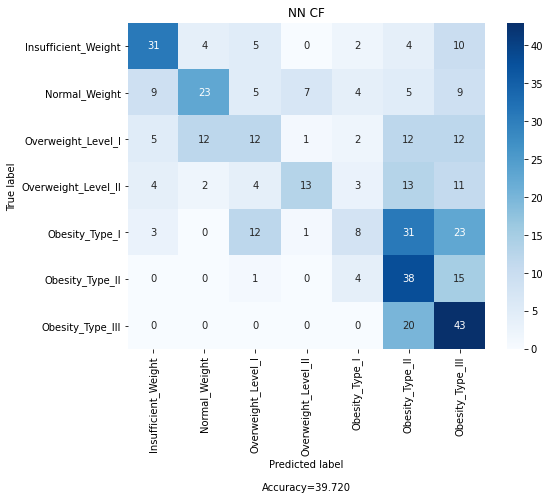

In [65]:
neuralNetwork(data1)

avec 44% de précision moyenne, le constat avec le subset data1 est le même que pour les modèles précédents.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.64      0.79      0.70        56
      2 - Normal_Weight       0.65      0.35      0.46        62
 3 - Overweight_Level_I       0.51      0.45      0.48        56
4 - Overweight_Level_II       0.51      0.44      0.47        50
     5 - Obesity_Type_I       0.54      0.58      0.56        78
    6 - Obesity_Type_II       0.61      0.78      0.68        58
   7 - Obesity_Type_III       0.87      0.98      0.93        63

               accuracy                           0.63       423
              macro avg       0.62      0.62      0.61       423
           weighted avg       0.62      0.63      0.61       423



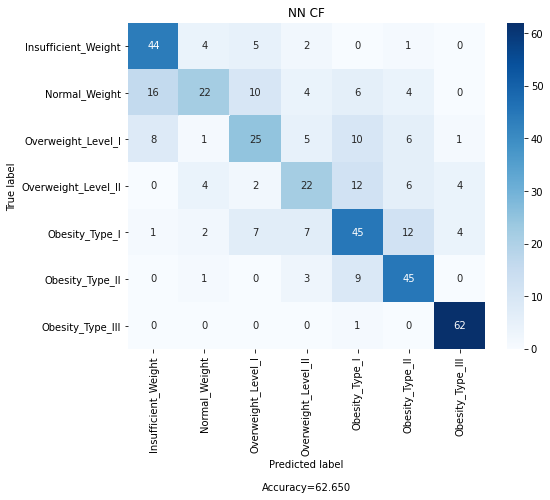

In [67]:
neuralNetwork(data2)

avec 66% de précision moyenne, le constat avec le subset data2 est le même que pour les modèles précédents.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.68      0.82      0.74        56
      2 - Normal_Weight       0.59      0.47      0.52        62
 3 - Overweight_Level_I       0.62      0.54      0.58        56
4 - Overweight_Level_II       0.57      0.52      0.54        50
     5 - Obesity_Type_I       0.68      0.69      0.68        78
    6 - Obesity_Type_II       0.80      0.91      0.85        58
   7 - Obesity_Type_III       0.95      1.00      0.98        63

               accuracy                           0.71       423
              macro avg       0.70      0.71      0.70       423
           weighted avg       0.70      0.71      0.70       423



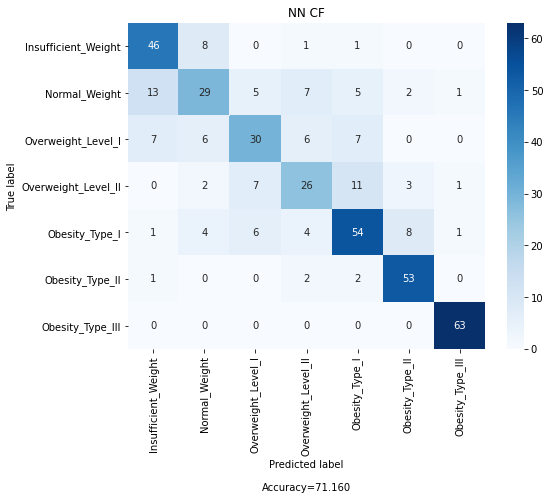

In [69]:
neuralNetwork(data)

avec le dataset entier, le réseau de neurone n'est efficace que pour prédire l'obésité de type 2 et 3

On peut remarquer que quel que soit le modèle utilisé, il est impératif d'utiliser toutes les colonnes du dataset

##4) 4e modèle : Decision Tree

In [ ]:
def linearRegression(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  dtc = DecisionTreeClassifier(random_state=0)
  dtc.fit(X_train, y_train)
  pred_dtc = dtc.predict(X_test)

  acc = round(accuracy_score(y_test,  pred_dtc)*100, 2)
  print(classification_report(y_test, pred_dtc))
  cf = confusion_matrix(y_test, pred_dtc)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="DT CF", percent=False, accuracy=acc)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.59      0.57      0.58        56
      2 - Normal_Weight       0.48      0.39      0.43        62
 3 - Overweight_Level_I       0.30      0.20      0.24        56
4 - Overweight_Level_II       0.67      0.24      0.35        50
     5 - Obesity_Type_I       0.33      0.09      0.14        78
    6 - Obesity_Type_II       0.25      0.16      0.19        58
   7 - Obesity_Type_III       0.30      1.00      0.47        63

               accuracy                           0.37       423
              macro avg       0.42      0.38      0.34       423
           weighted avg       0.41      0.37      0.33       423



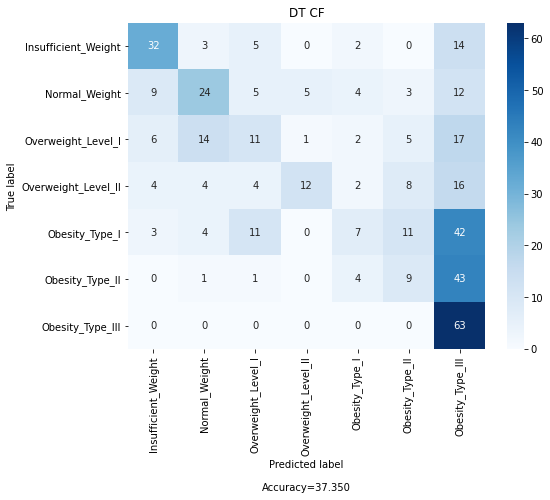

In [ ]:
linearRegression(data1)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.74      0.71      0.73        56
      2 - Normal_Weight       0.65      0.50      0.56        62
 3 - Overweight_Level_I       0.41      0.45      0.43        56
4 - Overweight_Level_II       0.42      0.52      0.46        50
     5 - Obesity_Type_I       0.55      0.55      0.55        78
    6 - Obesity_Type_II       0.65      0.69      0.67        58
   7 - Obesity_Type_III       0.97      0.89      0.93        63

               accuracy                           0.62       423
              macro avg       0.63      0.62      0.62       423
           weighted avg       0.63      0.62      0.62       423



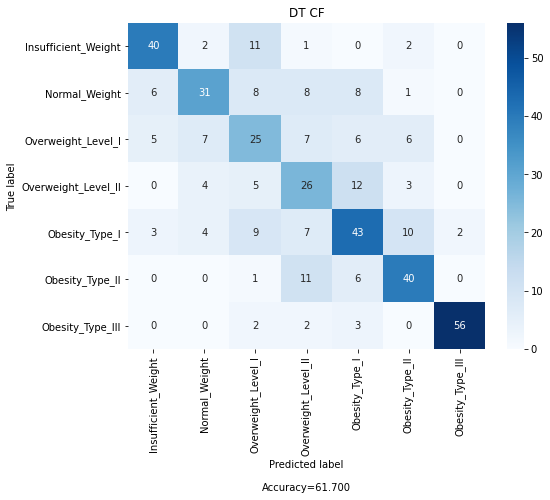

In [ ]:
linearRegression(data2)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.85      0.89      0.87        56
      2 - Normal_Weight       0.59      0.56      0.58        62
 3 - Overweight_Level_I       0.64      0.70      0.67        56
4 - Overweight_Level_II       0.69      0.54      0.61        50
     5 - Obesity_Type_I       0.72      0.72      0.72        78
    6 - Obesity_Type_II       0.83      0.91      0.87        58
   7 - Obesity_Type_III       1.00      1.00      1.00        63

               accuracy                           0.76       423
              macro avg       0.76      0.76      0.76       423
           weighted avg       0.76      0.76      0.76       423



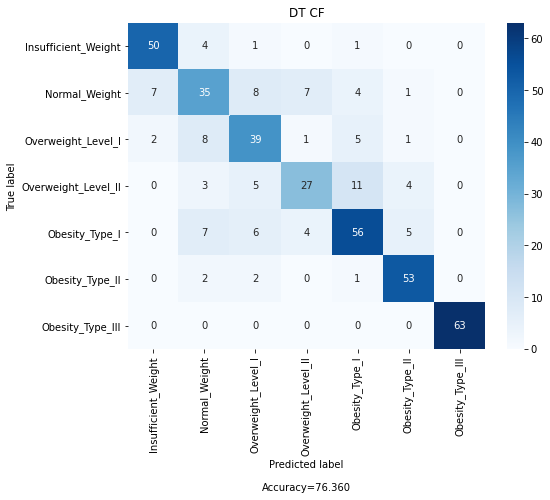

In [70]:
linearRegression(data)

On remarque que le modèle Decision tree est efficace pour prédire l’obésité ou la maigreur, mais l’est beaucoup moins pour le surpoids et la corpulence normale.

##5) 5e modèle : bagging

In [71]:
def bagging(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  bag = BaggingClassifier(random_state=0)
  bag.fit(X_train, y_train)
  pred_bag = bag.predict(X_test)

  acc = round(accuracy_score(y_test,  pred_bag)*100, 2)
  print(classification_report(y_test, pred_bag))
  cf = confusion_matrix(y_test, pred_bag)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="bagging CF", percent=False, accuracy=acc)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.60      0.57      0.59        56
      2 - Normal_Weight       0.44      0.26      0.33        62
 3 - Overweight_Level_I       0.30      0.29      0.29        56
4 - Overweight_Level_II       0.63      0.24      0.35        50
     5 - Obesity_Type_I       0.33      0.09      0.14        78
    6 - Obesity_Type_II       0.27      0.16      0.20        58
   7 - Obesity_Type_III       0.30      1.00      0.47        63

               accuracy                           0.37       423
              macro avg       0.41      0.37      0.34       423
           weighted avg       0.40      0.37      0.33       423



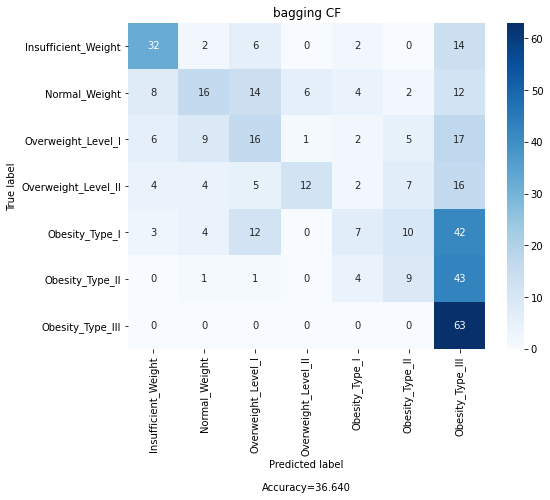

In [72]:
bagging(data1)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.75      0.73      0.74        56
      2 - Normal_Weight       0.62      0.53      0.57        62
 3 - Overweight_Level_I       0.49      0.41      0.45        56
4 - Overweight_Level_II       0.36      0.54      0.44        50
     5 - Obesity_Type_I       0.52      0.49      0.50        78
    6 - Obesity_Type_II       0.68      0.71      0.69        58
   7 - Obesity_Type_III       0.95      0.92      0.94        63

               accuracy                           0.62       423
              macro avg       0.63      0.62      0.62       423
           weighted avg       0.63      0.62      0.62       423



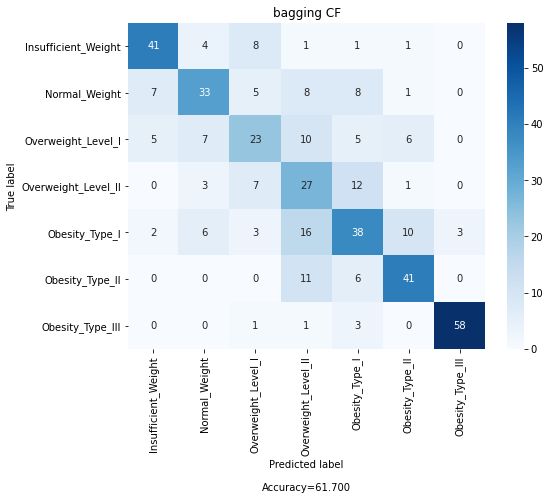

In [73]:
bagging(data2)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.73      0.91      0.81        56
      2 - Normal_Weight       0.61      0.53      0.57        62
 3 - Overweight_Level_I       0.74      0.80      0.77        56
4 - Overweight_Level_II       0.79      0.62      0.70        50
     5 - Obesity_Type_I       0.82      0.79      0.81        78
    6 - Obesity_Type_II       0.87      0.90      0.88        58
   7 - Obesity_Type_III       1.00      1.00      1.00        63

               accuracy                           0.80       423
              macro avg       0.79      0.79      0.79       423
           weighted avg       0.80      0.80      0.79       423



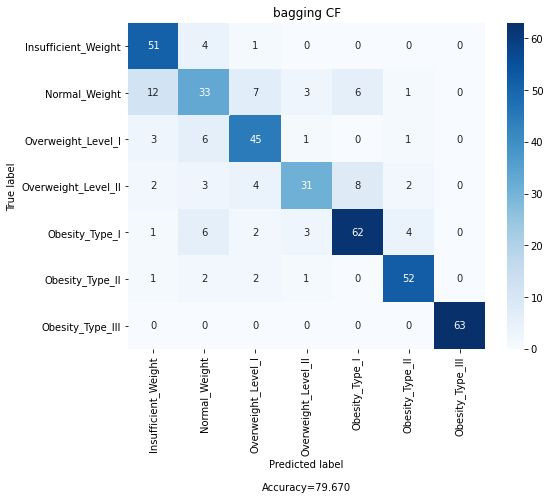

In [74]:
bagging(data)

Ce modèle est surtout efficace pour prédire l’obésité, mais est très moyen pour prédire le poids normal.

##6) 6e modele : gradient Boosting

In [75]:
def gradientBoosting(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  gbc = GradientBoostingClassifier()
  gbc.fit(X_train, y_train)
  pred_gbc = gbc.predict(X_test)

  acc = round(accuracy_score(y_test,  pred_gbc)*100, 2)
  print(classification_report(y_test, pred_gbc))
  cf = confusion_matrix(y_test, pred_gbc)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="GBC CF", percent=False, accuracy=acc)

In [ ]:
gradientBoosting(data1)

In [ ]:
gradientBoosting(data2)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.79      0.86      0.82        56
      2 - Normal_Weight       0.71      0.63      0.67        62
 3 - Overweight_Level_I       0.71      0.66      0.69        56
4 - Overweight_Level_II       0.69      0.72      0.71        50
     5 - Obesity_Type_I       0.78      0.74      0.76        78
    6 - Obesity_Type_II       0.84      0.93      0.89        58
   7 - Obesity_Type_III       0.97      1.00      0.98        63

               accuracy                           0.79       423
              macro avg       0.79      0.79      0.79       423
           weighted avg       0.79      0.79      0.79       423



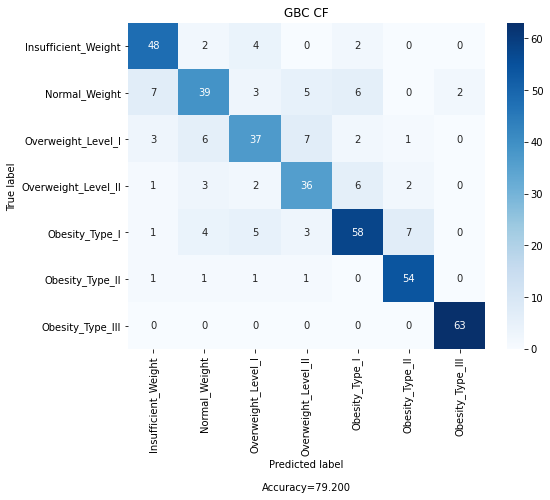

In [78]:
gradientBoosting(data)

Ce modèle prédit bien l'obésité et la maigreur, et arrive à prédire assez bien le poids normal et le surpoids, c'est le plus équilibré.

##7) 7e modele : knn

In [79]:
def knn(dataset):
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  knnc = KNeighborsClassifier()
  knnc.fit(X_train, y_train)
  pred_knnc = knnc.predict(X_test)

  acc = round(accuracy_score(y_test,  pred_knnc)*100, 2)
  print(classification_report(y_test, pred_knnc))
  cf = confusion_matrix(y_test, pred_knnc)
  make_confusion_matrix(cf, figsize=(8,6), categories=classes_cf, cbar=True, title="KNN CF", percent=False, accuracy=acc)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.48      0.25      0.33        56
      2 - Normal_Weight       0.32      0.31      0.31        62
 3 - Overweight_Level_I       0.46      0.21      0.29        56
4 - Overweight_Level_II       0.63      0.24      0.35        50
     5 - Obesity_Type_I       0.24      0.51      0.32        78
    6 - Obesity_Type_II       0.25      0.16      0.19        58
   7 - Obesity_Type_III       0.24      0.32      0.27        63

               accuracy                           0.30       423
              macro avg       0.37      0.29      0.30       423
           weighted avg       0.36      0.30      0.30       423



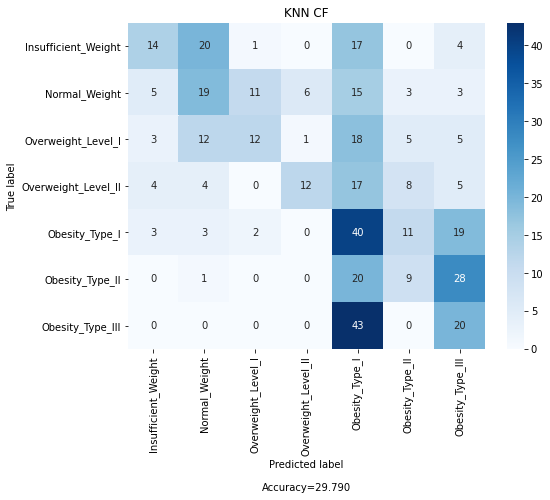

In [80]:
knn(data1)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.61      0.75      0.67        56
      2 - Normal_Weight       0.54      0.48      0.51        62
 3 - Overweight_Level_I       0.43      0.39      0.41        56
4 - Overweight_Level_II       0.47      0.50      0.49        50
     5 - Obesity_Type_I       0.55      0.49      0.52        78
    6 - Obesity_Type_II       0.71      0.71      0.71        58
   7 - Obesity_Type_III       0.88      0.94      0.91        63

               accuracy                           0.61       423
              macro avg       0.60      0.61      0.60       423
           weighted avg       0.60      0.61      0.60       423



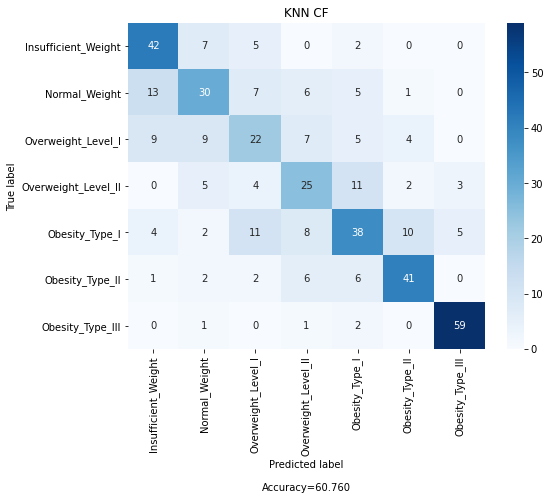

In [81]:
knn(data2)

                         precision    recall  f1-score   support

1 - Insufficient_Weight       0.63      0.86      0.73        56
      2 - Normal_Weight       0.60      0.45      0.51        62
 3 - Overweight_Level_I       0.72      0.55      0.63        56
4 - Overweight_Level_II       0.63      0.64      0.63        50
     5 - Obesity_Type_I       0.80      0.82      0.81        78
    6 - Obesity_Type_II       0.79      0.84      0.82        58
   7 - Obesity_Type_III       0.98      1.00      0.99        63

               accuracy                           0.74       423
              macro avg       0.74      0.74      0.73       423
           weighted avg       0.74      0.74      0.74       423



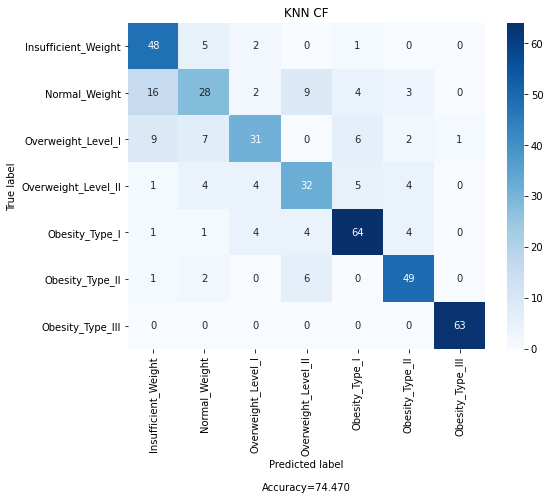

In [82]:
knn(data)

Le modèle KNN est surtout efficace pour prédire l’obésité, mais l’est beaucoup moins pour le reste.

##Comparaison

In [83]:
def getAccuracies(dataset):
  accuracy = []
  sets = separation(dataset)
  X_train = sets[0]
  X_test = sets[1]
  y_train = sets[2]
  y_test = sets[3]

  rfc = RandomForestClassifier(n_estimators=200)
  clf = svm.SVC()
  mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter= 500)
  dtc = DecisionTreeClassifier(random_state=0)
  bag = BaggingClassifier(random_state=0)
  gbc = GradientBoostingClassifier()
  knnc = KNeighborsClassifier()

  classifiers = [rfc, clf, mlpc, dtc, bag, gbc, knnc]
  preds = []
  for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
  
  return accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


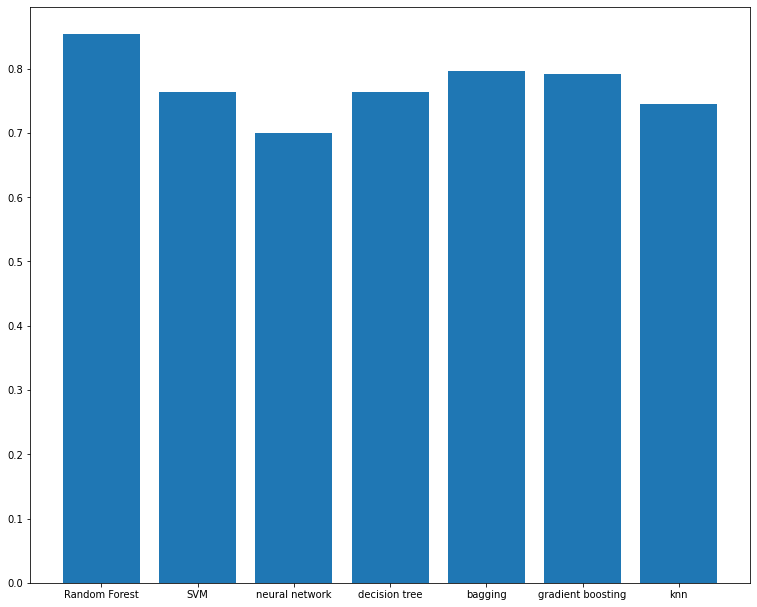

In [84]:
plt.rcParams['figure.figsize'] = [10,8]
X = ["Random Forest", "SVM", "neural network", "decision tree", "bagging", "gradient boosting", "knn"]
Y = getAccuracies(data)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.show()

##8) exportation du modèle

Nous avons décidé de n'expoter que le modèle Random forest pour notre API, car il s'agit de loin du plus efficace. Nous avons pour cela utilisé Pickle qui permet d'expoter un modèle et un Scaler afin de les utiliser sans avoir à les réentrainer.

In [55]:
def saveRandomForest(dataset):
  X = dataset.drop('NObeyesdad', axis = 1)
  y = dataset['NObeyesdad']

  #séparation en train et test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  rfc = RandomForestClassifier(n_estimators=200)
  rfc.fit(X_train, y_train)

  pickle.dump(sc, open(path + 'scaler.pkl','wb'))
  pickle.dump(rfc ,open(path + 'randomforest.pickle', 'wb'))

In [63]:
saveRandomForest(data)

In [57]:
def saveSVM(dataset):
  X = dataset.drop('NObeyesdad', axis = 1)
  y = dataset['NObeyesdad']

  #séparation en train et test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  clf = svm.SVC()
  clf.fit(X_train, y_train)

  pickle.dump(sc, open(path + 'scaler.pkl','wb'))
  pickle.dump(clf ,open(path + 'svm.pickle', 'wb'))

In [58]:
saveSVM(data)
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter= 500)